In [ ]:
# Tüm gerekli kütüphaneleri tek komutla kur
!pip install transformers torch gradio matplotlib seaborn pandas numpy tqdm plotly ipywidgets tokenizers

Hugging Face: doğal dil işleme (NLP) için açık kaynaklı modeller, veri setleri ve araçlar sunan bir platformdur. Özellikle transformers kütüphanesiyle, BERT, GPT gibi önceden eğitilmiş modelleri kolayca kullanmayı sağlar.

transformers: Hugging Face'in doğal dil işleme modellerini (örn. BERT, GPT) kullanmak için kütüphane.

torch: PyTorch, derin öğrenme modelleri oluşturmak ve eğitmek için kullanılan bir makine öğrenimi çerçevesi.

gradio: Makine öğrenimi modelleri için web tabanlı kullanıcı arayüzleri oluşturmayı sağlayan kütüphane.

matplotlib: Veri görselleştirme için 2D grafikler ve çizimler oluşturan kütüphane.

seaborn: Matplotlib tabanlı, istatistiksel veri görselleştirme için daha estetik grafikler sunan kütüphane.

pandas: Veri analizi ve manipülasyonu için güçlü veri yapıları (DataFrame) sağlayan kütüphane.

numpy: Sayısal hesaplamalar için hızlı dizi işlemleri ve matematiksel fonksiyonlar sunar.

tqdm: Döngülerde ilerleme çubuğu göstererek işlem ilerlemesini takip etmeyi sağlar.

plotly: Etkileşimli ve dinamik veri görselleştirme grafikleri oluşturmak için kütüphane.

ipywidgets: Jupyter Notebook'larda etkileşimli widget'lar (düğmeler, kaydırıcılar) oluşturur.

tokenizers: Metin tokenizasyonu için hızlı ve özelleştirilebilir araçlar sağlayan kütüphane

In [ ]:
#KÜTÜPHANELERI İÇE AKTARMA

# Temel Python kütüphaneleri
import os
import warnings
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# PyTorch
import torch
import torch.nn.functional as F

# Hugging Face Transformers
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    BertModel,
    BertTokenizer,
    pipeline,
    AutoTokenizer,
    AutoModel
)

# Gradio arayüzü
import gradio as gr



## 🧰 **Kullanılan Kütüphane ve Araçlar Özeti**

### 📁 **Temel Python Kütüphaneleri**

* 🗂️ **os** → Dosya ve dizin işlemleri (klasör kontrolü, yol yönetimi vs.)
* 📊 **pandas** → Veri analizi ve veri çerçeveleriyle çalışma (DataFrame)
* 🔢 **numpy** → Sayısal hesaplamalar ve dizi işlemleri
* 📈 **tqdm** → Döngülerde ilerleme çubuğu gösterimi (progress bar)
* 🎨 **matplotlib & seaborn** → Statik veri görselleştirmeleri
* 🌐 **plotly** → Etkileşimli ve dinamik grafikler

---

### 🔥 **PyTorch (Derin Öğrenme)**

* 💡 **torch** → Temel derin öğrenme yapıları ve tensor işlemleri
* 🧠 **torch.nn.functional** → Aktivasyon fonksiyonları ve kayıp hesaplamaları

---

### 🤗 **Hugging Face Transformers (NLP)**

* 🧠 **GPT2LMHeadModel, GPT2Tokenizer** → GPT-2 metin üretimi ve tokenizasyonu
* 🔍 **BertModel, BertTokenizer** → BERT metin analizi ve tokenizasyonu
* 🔧 **pipeline** → Kolayca hazır NLP işlemleri (text-generation, sentiment vs.)
* 🧩 **AutoTokenizer, AutoModel** → Otomatik model/tokenizer yükleme

---

### 🌐 **Gradio (Web Arayüzü)**

* 🖥️ **gr (Gradio)** → Web tabanlı demo ve arayüzler oluşturmak için basit araç
  ➡️ Model çıktılarının kullanıcıyla kolayca etkileşimli paylaşımı 🤝


In [ ]:
# GPU kontrol ve ayarları
print("🔧 Sistem Kontrolleri:")
print(f"✅ CUDA Mevcut: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"🚀 GPU: {torch.cuda.get_device_name(0)}")
    print(f"📊 GPU Bellek: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    device = torch.device('cuda')
else:
    print("⚠️  GPU bulunamadı, CPU kullanılacak")
    device = torch.device('cpu')

print(f"🎯 Kullanılacak Cihaz: {device}")


CPU: Genel amaçlı, sıralı işlemler için güçlü, esnek ama daha yavaş.

GPU: Paralel işlemler için optimize, büyük veri ve derin öğrenmede çok daha hızlı. GPU, makine öğrenimi gibi yoğun hesaplama gerektiren görevlerde tercih edilirken, CPU genel sistem yönetimi için vazgeçilmezdir.

Kod, sistemde GPU varsa onu kullanmayı tercih ediyor çünkü GPU, derin öğrenme ve yoğun hesaplamalarda daha hızlı. GPU yoksa, CPU otomatik olarak seçiliyor. Bu, hem performans optimizasyonu hem de sistem uyumluluğu için yapılan bir kontrol.


[ ]


In [ ]:
# Matplotlib ayarları
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Seaborn ayarları
sns.set_palette("husl")

# Pandas ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Numpy ayarları
np.random.seed(42)

# PyTorch ayarları
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

Görselleştirme: Matplotlib ve Seaborn ayarları, grafiklerin daha okunabilir ve estetik olmasını sağlar.

Veri Görüntüleme: Pandas ayarları, veri çerçevelerinin konsolda daha iyi görüntülenmesini sağlar.

Tekrarlanabilirlik: Numpy ve PyTorch'ta rastgele sayı üreteçlerine sabit bir başlangıç değeri (seed=42) atanması, deneylerin ve sonuçların tekrarlanabilir olmasını sağlar. Bu, özellikle makine öğrenimi modellerinde önemlidir, çünkü rastgelelik sonuçları etkileyebilir.

GPU Desteği: PyTorch ayarları, GPU varsa onun da tekrarlanabilir olmasını sağlar.

In [ ]:
# Genel yardımcı fonksiyonlar
def print_separator(title=""):
    """Güzel bir ayırıcı yazdırır"""
    print("\n" + "="*50)
    if title:
        print(f"🎯 {title}")
        print("="*50)

def check_model_size(model):
    """Model boyutunu hesaplar"""
    param_count = sum(p.numel() for p in model.parameters())
    print(f"📊 Model Parametresi: {param_count:,}")
    print(f"📦 Tahmini Boyut: {param_count * 4 / (1024**2):.1f} MB")

def clear_gpu_memory():
    """GPU belleğini temizler"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("🧹 GPU belleği temizlendi")

Bu fonksiyonlar, makine öğrenimi projelerinde

kodun okunabilirliğini artırmak (print_separator),

model boyutunu analiz etmek (check_model_size) ve

GPU kaynaklarını verimli kullanmak (clear_gpu_memory)

için yardımcı araçlar sağlar. Özellikle derin öğrenme çalışmalarında, bu tür fonksiyonlar hata ayıklamayı ve kaynak yönetimini kolaylaştırır.

In [ ]:
print_separator("LLM'lere Giriş ve Temel Kavramlar")
print("🚀 Proje başlatılıyor...")
print("📚 Kütüphaneler yüklendi")
print("⚡ GPU kontrolü tamamlandı")
print("🎯 Hazır!")

# **2- MODEL YÜKLEME (GPT-2 VE BERT)**


## 🔍 Transformer Mimarisi ve NLP Modelleri

### 🧠 Transformer Mimarisi

Transformer, doğal dil işleme (NLP) ve derin öğrenme alanlarında kullanılan modern bir yapay sinir ağı yapısıdır. Özellikle **BERT**, **GPT** gibi dil modelleri ve çeviri sistemlerinde yaygın olarak kullanılır.
Geleneksel sıralı modeller (RNN, LSTM) yerine **paralel işlem** yapabildiği için daha hızlı ve verimlidir.

### 🎯 Attention Mekanizması

Transformer'ın temel bileşenidir.
Her kelimenin diğer kelimelerle olan ilişkisini değerlendirerek önemli olanlara daha fazla **ağırlık (dikkat)** verir.

**Örnek:**
*"Kedi ağaca tırmandı."* cümlesinde, “kedi” ve “tırmandı” kelimeleri anlam açısından ilişkilidir ve model bu bağı fark eder.
Attention sayesinde model, bağlamı daha iyi anlar.

---

### 🔍 NLP ve Dil Modelleri: Temel Bilgiler

| **Model**      | **Yönü**           | **Ne Yapar?**                         | **Kullanım Alanı**                   |
| -------------- | ------------------ | ------------------------------------- | ------------------------------------ |
| **RNN / LSTM** | Sıralı (tek yönlü) | Kelimeleri sırayla işler              | Eski modeller, çeviri, duygu analizi |
| **Seq2Seq**    | Encoder + Decoder  | Girdi dizisini çıktı dizisine çevirir | Makine çevirisi, özetleme            |
| **BERT**       | Çift yönlü         | Anlam çıkarımı yapar, boşluk doldurur | Anlama, sınıflandırma                |
| **GPT**        | Tek yönlü          | Metin üretir                          | Yazı yazma, sohbet, kod üretimi      |

---

### 🏗️ Encoder - Decoder Yapısı

* **Encoder**: Girdi metnini işler, anlamlandırır.
* **Decoder**: İşlenen bilgiden yeni çıktı üretir.

| Yapı Türü       | Açıklama              | Örnek Model |
| --------------- | --------------------- | ----------- |
| Encoder-Only    | Sadece anlama         | BERT        |
| Decoder-Only    | Sadece üretme         | GPT         |
| Encoder-Decoder | Hem anlama hem üretme | T5, Seq2Seq |

---

### 🧪 Eğitim Aşamaları

#### 🔧 Pre-training (Ön Eğitim)

* Model, çok büyük metinlerle eğitilir.
* Amaç: Genel dil kurallarını öğrenmek (gramer, yapı, bağlam).
* **Örnek veriler:**

  * "Ali okula gitti."
  * "Bugün hava çok güzel."
  * "Kediler süt içer."
* Henüz belirli bir görev yoktur.

#### 🎯 Fine-tuning (İnce Ayar / Göreve Uyarlama)

* Model, belirli bir görev için özel verilerle tekrar eğitilir.
* **Örnek:**
  E-posta spam filtresi oluşturulmak istenirse, modele “spam” ve “değil” etiketli e-postalar gösterilir.

---

### 🛠️ Teknik Araçlar

* **Hugging Face**: Hazır NLP modelleri kütüphanesi
* **PyTorch**: Derin öğrenme framework’ü
* **Gradio**: Basit web arayüzü oluşturma aracı
* **GPU**: Hızlı hesaplama için grafik işlem birimi


In [ ]:
#GPT-2 Model Yükleme

print_separator("GPT-2 Model Yükleme")

try:
    # GPT-2 tokenizer ve model yükleme
    print("📥 GPT-2 tokenizer yükleniyor...")
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

    # Pad token ekle (GPT-2'de yoktur)
    gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

    print("📥 GPT-2 model yükleniyor...")
    gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')

    # Modeli GPU'ya taşı
    gpt2_model = gpt2_model.to(device)
    gpt2_model.eval()  # Evaluation moduna al

    print("✅ GPT-2 başarıyla yüklendi!")
    check_model_size(gpt2_model)

    # Test
    test_input = "The future of artificial intelligence"
    test_tokens = gpt2_tokenizer.encode(test_input, return_tensors='pt').to(device)
    print(f"🧪 Test input: '{test_input}'")
    print(f"🔢 Token sayısı: {test_tokens.shape[1]}")

except Exception as e:
    print(f"❌ GPT-2 yükleme hatası: {e}")
    gpt2_model = None
    gpt2_tokenizer = None


## 🔤 Tokenizer

Metni, modelin anlayabileceği sayısal forma çevirir.
**GPT-2**, kelimeleri veya kelime parçalarını **token**'lara böler.

---

## 🤖 Model

**GPT-2**, verilen metni okuyup **devamını tahmin edebilir**.
Örneğin:
Girdi: `"Merhaba, ben"`
Çıktı: `"Merhaba, ben bir yapay zeka modeliyim."`

---

## 📌 GPT-2 Nedir?

**GPT-2 (Generative Pre-trained Transformer 2)**, OpenAI tarafından geliştirilen **Transformer tabanlı** bir dil modelidir.

### 🔹 Temel Özellikleri:

* **Amaç:**
  Metin üretimi, metin tamamlama, çeviri gibi doğal dil işleme görevlerinde kullanılır.

* **Mimari:**
  Sadece **Transformer’ın decoder kısmını** kullanır.
  Her kelimeyi önceki kelimelere bakarak tahmin eder (otoregresif model).

* **Ön Eğitim:**
  Çok büyük metin veri setleriyle (örneğin: web sayfaları, kitaplar) eğitilmiştir.
  Bu sayede genel dil bilgisini taşır.

* **Boyutlar:**
  GPT-2'nin farklı versiyonları vardır:

  * 124M
  * 355M
  * 774M
  * 1.5B parametre
    Kodda kullanılan `'gpt2'`, en küçük olanıdır (124 milyon parametre).

* **Kullanım Alanları:**

  * Sohbet botları
  * Hikâye yazımı
  * Metin özetleme
  * Soru-cevap sistemleri


In [ ]:
#BERT Model Yükleme^

print_separator("BERT Model Yükleme")

try:
    # BERT tokenizer ve model yükleme
    print("📥 BERT tokenizer yükleniyor...")
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    print("📥 BERT model yükleniyor...")
    bert_model = BertModel.from_pretrained('bert-base-uncased')

    # Modeli GPU'ya taşı
    bert_model = bert_model.to(device)
    bert_model.eval()  # Evaluation moduna al

    print("✅ BERT başarıyla yüklendi!")
    check_model_size(bert_model)

    # Test
    test_input = "The future of artificial intelligence"
    test_tokens = bert_tokenizer.encode(test_input, return_tensors='pt').to(device)
    print(f"🧪 Test input: '{test_input}'")
    print(f"🔢 Token sayısı: {test_tokens.shape[1]}")

except Exception as e:
    print(f"❌ BERT yükleme hatası: {e}")
    bert_model = None
    bert_tokenizer = None

## ✂️ 3. Tokenization (Token’lara Ayırma)

* Metinleri, modelin anlayabileceği küçük sayısal parçalara böler.
* Bu parçalara **token** denir (kelime, kelime parçası veya harf olabilir).

🎯 **Örnek:**
Metin: `"Kitap okuyorum"`
Token'lara ayrılabilir: `"Ki"`, `"tap"`, `"oku"`, `"yor"`, `"um"` gibi küçük parçalar
➡️ Bu token’lar daha sonra sayılara çevrilir.

🧠 **Düşün:** Bir cümleyi LEGO parçalarına ayırmak gibi.

---

## 🔢 4. Embeddings (Sayısal Temsil)

* Her kelime/token, modelde anlamını taşıyan bir sayı vektörüne dönüştürülür.
* Bu sayede model, kelimeler arasındaki anlam ilişkilerini **sayısal olarak** anlayabilir.

🎯 **Örnek:**

* `"kitap"` → `[0.12, -0.45, 0.87, ...]`
* `"defter"` → `[0.14, -0.43, 0.85, ...]`
  ➡️ Bu iki kelimenin sayı vektörleri benzer olduğu için model, anlamlarının yakın olduğunu bilir.

🧠 **Düşün:** Kelimeleri uzaydaki noktalar gibi düşün — yakın olanlar anlamca benzer.

---

## 📘 BERT

**Tanım:**
Google’ın 2018’de geliştirdiği, Transformer tabanlı, **çift yönlü** dil modeli.

**Amaç:**
Metinlerin anlamını çıkarmak (sınıflandırma, soru-cevap, varlık tanıma).

**Çalışma Şekli:**

* **Çift yönlü:** Cümlenin tamamını aynı anda analiz eder.

**Ön Eğitim:**

* **MLM (Masked Language Model):** Rastgele kelimeler gizlenir ve modelden bunları tahmin etmesi beklenir.
* **NSP (Next Sentence Prediction):** İki cümle arasında bağlantı olup olmadığını tahmin eder.

**İnce Ayar (Fine-tuning):**

* Özel görevler için model yeniden eğitilir.

---

### 🔧 BERT’in Bileşenleri

* **Tokenizer:**
  WordPiece algoritmasıyla metni token’lara böler. Özel token’lar: `[CLS]`, `[SEP]`

### 🛠️ Kullanım Alanları

* Duygu analizi
* Soru-cevap sistemleri
* Arama motorları (örneğin Google)
* Adlandırılmış varlık tanıma (NER)

---

### ✅ Avantaj

* Bağlamı **derinlemesine** anlar.

### ⚠️ Dezavantaj

* Yüksek **hesaplama gücü** gerektirir.


In [ ]:
#Pipeline Yükleme (Alternatif Yöntem)

print_separator("Pipeline Yükleme")

try:
    # GPT-2 pipeline (metin üretimi için)
    print("📥 GPT-2 pipeline yükleniyor...")
    gpt2_pipeline = pipeline(
        'text-generation',
        model='gpt2',
        tokenizer='gpt2',
        device=0 if torch.cuda.is_available() else -1
    )

    # BERT pipeline (feature extraction için)
    print("📥 BERT pipeline yükleniyor...")
    bert_pipeline = pipeline(
        'feature-extraction',
        model='bert-base-uncased',
        tokenizer='bert-base-uncased',
        device=0 if torch.cuda.is_available() else -1
    )

    print("✅ Pipeline'lar başarıyla yüklendi!")

    # Pipeline test
    test_text = "Artificial intelligence is"
    gpt2_result = gpt2_pipeline(test_text, max_length=20, num_return_sequences=1)
    print(f"🧪 GPT-2 Pipeline Test: {gpt2_result[0]['generated_text']}")

except Exception as e:
    print(f"❌ Pipeline yükleme hatası: {e}")
    gpt2_pipeline = None
    bert_pipeline = None

## 🔄 Pipeline Nedir ve Ne İşe Yarar?

### 📌 Pipeline

**Pipeline**, Hugging Face’in `transformers` kütüphanesinde, NLP görevlerini kolaylaştırmak için tasarlanmış yüksek seviyeli bir API’dir.
Model ve tokenizer’ı otomatik olarak birleştirir ve belirli bir görev için hazır bir iş akışı sunar.

---

### 💡 Ne İşe Yarar?

* **Kolay Kullanım:**
  Model ve tokenizer’ı ayrı ayrı yapılandırmak yerine, tek satırda bir NLP görevi için hazır bir sistem oluşturur.

* **Görev Çeşitliliği:**
  Metin üretimi, özellik çıkarma, duygu analizi, çeviri gibi birçok NLP görevini destekler.

* **Hızlı Prototipleme:**
  Araştırmacılar ve geliştiriciler, karmaşık kodlar yazmadan modelleri hızlıca test edebilir.

* **Cihaz Desteği:**
  GPU veya CPU’yu otomatik olarak algılayıp kullanabilir.

---

### ⚙️ Açıklama

Bu kod, **GPT-2** ve **BERT** modellerini `pipeline` API’si ile yükleyerek:

* **Metin üretimi** (GPT-2)
* **Özellik çıkarma** (BERT)

görevleri için hazır hale getiriyor.

---

### ✅ Avantajlar

* Pipeline, NLP görevlerini basitleştirir.
* Hızlı prototipleme imkânı sağlar.
* Çıktılar, modellerin başarıyla yüklendiğini ve GPT-2’nin metin ürettiğini gösterir.


In [ ]:
#Model Bilgileri ve Karşılaştırma

print_separator("Model Bilgileri")

# Model bilgilerini karşılaştır
model_info = {
    'Model': ['GPT-2', 'BERT'],
    'Tip': ['Decoder-Only', 'Encoder-Only'],
    'Parametre Sayısı': ['124M', '110M'],
    'Vocabulary Size': [50257, 30522],
    'Max Sequence Length': [1024, 512],
    'Kullanım Alanı': ['Text Generation', 'Text Understanding']
}

df_models = pd.DataFrame(model_info)
print(df_models.to_string(index=False))

In [ ]:
#Bellek Durumu Kontrol

print_separator("Bellek Durumu")

# GPU bellek kullanımı
if torch.cuda.is_available():
    print(f"🔍 GPU Bellek Kullanımı:")
    print(f"   Ayrılmış: {torch.cuda.memory_allocated(0) / 1024**2:.1f} MB")
    print(f"   Önbellekte: {torch.cuda.memory_reserved(0) / 1024**2:.1f} MB")
    print(f"   Kullanılabilir: {torch.cuda.get_device_properties(0).total_memory / 1024**2:.1f} MB")

# Model yükleme durumu kontrol
models_loaded = []
if gpt2_model is not None:
    models_loaded.append("GPT-2 ✅")
if bert_model is not None:
    models_loaded.append("BERT ✅")

print(f"\n📊 Yüklenen Modeller: {', '.join(models_loaded)}")

In [ ]:
#Hata Ayıklama Fonksiyonu

def check_models():
    """Modellerin düzgün yüklenip yüklenmediğini kontrol eder"""
    print_separator("Model Kontrol")

    # GPT-2 kontrol
    if gpt2_model is not None and gpt2_tokenizer is not None:
        print("✅ GPT-2: Hazır")
        try:
            test_input = "Hello world"
            inputs = gpt2_tokenizer(test_input, return_tensors='pt').to(device)
            with torch.no_grad():
                outputs = gpt2_model(**inputs)
            print("✅ GPT-2: Test başarılı")
        except Exception as e:
            print(f"❌ GPT-2: Test hatası - {e}")
    else:
        print("❌ GPT-2: Yüklenmedi")

    # BERT kontrol
    if bert_model is not None and bert_tokenizer is not None:
        print("✅ BERT: Hazır")
        try:
            test_input = "Hello world"
            inputs = bert_tokenizer(test_input, return_tensors='pt').to(device)
            with torch.no_grad():
                outputs = bert_model(**inputs)
            print("✅ BERT: Test başarılı")
        except Exception as e:
            print(f"❌ BERT: Test hatası - {e}")
    else:
        print("❌ BERT: Yüklenmedi")

# Kontrol fonksiyonunu çalıştır
check_models()

# **3-METIN TAMAMLAMA FONKSIYONLARI**

In [ ]:
#GPT-2 Metin Tamamlama Fonksiyonu

print_separator("GPT-2 Metin Tamamlama Fonksiyonu")

def generate_text_gpt2(prompt, max_length=50, num_return_sequences=1, temperature=0.7, top_p=0.9, do_sample=True):
    """
    GPT-2 ile metin tamamlama

    Args:
        prompt: Başlangıç metni
        max_length: Maksimum token sayısı
        num_return_sequences: Kaç farklı sonuç üretileceği
        temperature: Yaratıcılık seviyesi (0.1-2.0)
        top_p: Nucleus sampling parametresi
        do_sample: Sampling yapılıp yapılmayacağı
    """
    if gpt2_model is None or gpt2_tokenizer is None:
        return "❌ GPT-2 modeli yüklenmedi!"

    try:
        # Input'u tokenize et
        inputs = gpt2_tokenizer.encode(prompt, return_tensors='pt').to(device)

        # Giriş uzunluğunu kontrol et
        if inputs.shape[1] > 1000:
            return "❌ Giriş metni çok uzun! (Max 1000 token)"

        # Metin üret
        with torch.no_grad():
            outputs = gpt2_model.generate(
                inputs,
                max_length=max_length,
                num_return_sequences=num_return_sequences,
                temperature=temperature,
                top_p=top_p,
                do_sample=do_sample,
                pad_token_id=gpt2_tokenizer.eos_token_id,
                attention_mask=torch.ones(inputs.shape).to(device)
            )

        # Sonuçları decode et
        results = []
        for i, output in enumerate(outputs):
            generated_text = gpt2_tokenizer.decode(output, skip_special_tokens=True)
            results.append({
                'sequence': i + 1,
                'text': generated_text,
                'new_text': generated_text[len(prompt):].strip()
            })

        return results

    except Exception as e:
        return f"❌ Hata: {str(e)}"

# Test fonksiyonu
print("🧪 GPT-2 fonksiyonu test ediliyor...")
test_prompt = "The future of artificial intelligence is"
test_result = generate_text_gpt2(test_prompt, max_length=30)
if isinstance(test_result, list):
    print(f"✅ Test başarılı: {test_result[0]['text']}")
else:
    print(f"❌ Test hatası: {test_result}")

Fonksiyon Tanımı: generate_text_gpt2 adında bir fonksiyon, verilen bir başlangıç metnini (prompt) tamamlamak için GPT-2 modelini kullanır. Parametreler:

prompt: Başlangıç metni.

max_length: Üretilecek metnin maksimum uzunluğu (token sayısı).

num_return_sequences: Kaç farklı metin üretileceği.

temperature: Yaratıcılık seviyesi (düşük değerler daha tahmin edilebilir, yüksek değerler daha yaratıcı sonuçlar üretir).

top_p: Nucleus sampling için olasılık sınırı./Metin üretiminde rastgeleliği kontrollü şekilde sağlamak için kullanılır.

do_sample: Rastgele örnekleme yapılıp yapılmayacağı.

Özet: Kod, GPT-2 modelini kullanarak kullanıcıdan alınan bir metni tamamlar ve test amaçlı bir örnek çalıştırır.

In [ ]:
#BERT Metin Analizi Fonksiyonu

print_separator("BERT Metin Analizi Fonksiyonu")

def analyze_text_bert(text, return_attention=False):
    """
    BERT ile metin analizi ve özellik çıkarımı

    Args:
        text: Analiz edilecek metin
        return_attention: Attention skorlarını döndürüp döndürmeyeceği
    """
    if bert_model is None or bert_tokenizer is None:
        return "❌ BERT modeli yüklenmedi!"

    try:
        # Metni tokenize et
        inputs = bert_tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        ).to(device)

        # Model çıktısını al
        with torch.no_grad():
            outputs = bert_model(**inputs, output_attentions=return_attention)

        # Son katman hidden state'leri
        last_hidden_states = outputs.last_hidden_state

        # CLS token (cümle temsili)
        cls_embedding = last_hidden_states[:, 0, :]

        # Token embeddings
        token_embeddings = last_hidden_states[0]

        # Tokenları decode et
        tokens = bert_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

        result = {
            'tokens': tokens,
            'token_count': len(tokens),
            'cls_embedding': cls_embedding.cpu().numpy(),
            'token_embeddings': token_embeddings.cpu().numpy(),
            'embedding_dim': last_hidden_states.shape[-1]
        }

        if return_attention:
            result['attention_weights'] = outputs.attentions

        return result

    except Exception as e:
        return f"❌ Hata: {str(e)}"

# Test fonksiyonu
print("🧪 BERT fonksiyonu test ediliyor...")
test_text = "The future of artificial intelligence is bright"
test_result = analyze_text_bert(test_text)
if isinstance(test_result, dict):
    print(f"✅ Test başarılı: {test_result['token_count']} token, {test_result['embedding_dim']} boyut")
else:
    print(f"❌ Test hatası: {test_result}")

Özet: Kod, BERT modelini kullanarak metni tokenize eder, gömülmeler ve tokenlar gibi özellikler çıkarır ve test amaçlı bir örnek çalıştırır.

İşlem Akışı: BERT modeli ve tokenizer'ın yüklü olup olmadığı kontrol edilir.

Metin, BERT tokenizer ile tokenize edilir (maksimum 512 token, kesme ve doldurma uygulanır).

Model, tokenize edilen metni işler ve çıktılar (hidden states, attention skorları) alınır.

CLS token'ın gömülmesi (cümle temsili) ve tüm tokenların gömülmeleri (embeddings) elde edilir.

Tokenlar, ID'lerden orijinal kelimelere çevrilir.

Sonuç olarak bir sözlük döndürülür:

tokens: Kelime parçaları (tokenlar) token_count: Kaç tane token var? cls_embedding: Cümle özeti olan CLS token’ın temsili token_embeddings: Her kelimenin sayısal temsili embedding_dim: Her temsil kaç boyutlu? attention_weights: (İsteğe bağlı) Modelin dikkat dağılımı

Hata Yönetimi: Model yüklenmemişse veya hata oluşursa hata mesajı döndürülür.

Test: Fonksiyon, "The future of artificial intelligence is bright" metniyle test edilir ve başarılıysa token sayısı ile gömülme boyutu yazdırılır.


In [ ]:
#Gelişmiş Metin Tamamlama Fonksiyonu

print_separator("Gelişmiş Metin Tamamlama")

def advanced_text_completion(prompt, model_type="gpt2", **kwargs):
    """
    Gelişmiş metin tamamlama fonksiyonu

    Args:
        prompt: Başlangıç metni
        model_type: "gpt2" veya "pipeline"
        **kwargs: Ek parametreler
    """

    if model_type == "gpt2":
        # Manuel GPT-2 kullanımı
        return generate_text_gpt2(prompt, **kwargs)

    elif model_type == "pipeline":
        # Pipeline kullanımı
        if gpt2_pipeline is None:
            return "❌ GPT-2 pipeline yüklenmedi!"

        try:
            max_length = kwargs.get('max_length', 50)
            num_return_sequences = kwargs.get('num_return_sequences', 1)
            temperature = kwargs.get('temperature', 0.7)

            results = gpt2_pipeline(
                prompt,
                max_length=max_length,
                num_return_sequences=num_return_sequences,
                temperature=temperature,
                do_sample=True,
                truncation=True
            )

            return results

        except Exception as e:
            return f"❌ Pipeline hatası: {str(e)}"

    else:
        return "❌ Geçersiz model tipi!"

# Test fonksiyonu
print("🧪 Gelişmiş fonksiyon test ediliyor...")
test_results = advanced_text_completion(
    "Machine learning is",
    model_type="gpt2",
    max_length=40,
    temperature=0.8
)
if isinstance(test_results, list):
    print(f"✅ Test başarılı: {test_results[0]['text']}")

In [ ]:
#Metin Karşılaştırma Fonksiyonu

print_separator("Metin Karşılaştırma Fonksiyonu")

def compare_models(prompt, gpt2_params=None, bert_analysis=True):
    """
    GPT-2 ve BERT sonuçlarını karşılaştır

    Args:
        prompt: Giriş metni
        gpt2_params: GPT-2 parametreleri
        bert_analysis: BERT analizi yapılıp yapılmayacağı
    """

    if gpt2_params is None:
        gpt2_params = {'max_length': 50, 'temperature': 0.7}

    results = {
        'prompt': prompt,
        'gpt2_result': None,
        'bert_result': None,
        'comparison': {}
    }

    # GPT-2 sonucu
    print("🔄 GPT-2 ile metin üretiliyor...")
    gpt2_result = generate_text_gpt2(prompt, **gpt2_params)
    results['gpt2_result'] = gpt2_result

    # BERT analizi
    if bert_analysis:
        print("🔄 BERT ile analiz yapılıyor...")
        bert_result = analyze_text_bert(prompt)
        results['bert_result'] = bert_result

    # Karşılaştırma
    if isinstance(gpt2_result, list) and isinstance(bert_result, dict):
        results['comparison'] = {
            'gpt2_generated_length': len(gpt2_result[0]['new_text'].split()),
            'bert_token_count': bert_result['token_count'],
            'bert_embedding_dim': bert_result['embedding_dim']
        }

    return results

# Test fonksiyonu
print("🧪 Karşılaştırma fonksiyonu test ediliyor...")
comparison_test = compare_models("Technology has changed our lives")
if comparison_test['gpt2_result'] and comparison_test['bert_result']:
    print("✅ Karşılaştırma testi başarılı!")
else:
    print("❌ Karşılaştırma testi başarısız!")

In [ ]:
#Toplu Metin İşleme Fonksiyonu


print_separator("Toplu Metin İşleme")

def batch_text_processing(prompts, model_type="gpt2", show_progress=True):
    """
    Birden fazla prompt'u toplu olarak işler

    Args:
        prompts: Prompt listesi
        model_type: Kullanılacak model
        show_progress: İlerleme çubuğu gösterilsin mi
    """

    results = []

    iterator = tqdm(prompts, desc="İşleniyor") if show_progress else prompts

    for prompt in iterator:
        if model_type == "gpt2":
            result = generate_text_gpt2(prompt, max_length=30)
        elif model_type == "bert":
            result = analyze_text_bert(prompt)
        else:
            result = "❌ Geçersiz model tipi"

        results.append({
            'prompt': prompt,
            'result': result
        })

        # GPU belleğini temizle
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    return results

# Test fonksiyonu
print("🧪 Toplu işleme test ediliyor...")
test_prompts = [
    "The weather today is",
    "Artificial intelligence will",
    "In the future, humans and robots"
]

batch_results = batch_text_processing(test_prompts, model_type="gpt2")
print(f"✅ {len(batch_results)} prompt işlendi!")

Bu fonksiyon, birden fazla prompt’u GPT-2 veya BERT ile toplu olarak işler, sonuçları depolar ve GPU belleğini yönetir. Test, üç prompt’un GPT-2 ile işlendiğini doğrular. Önceki fonksiyonlara kıyasla, toplu işlem yapabilme ve ilerleme takibi gibi özellikleriyle daha ölçeklenebilir ve kullanıcı dostudur.

In [ ]:
#Fonksiyon Özeti

print_separator("Fonksiyon Özeti")

functions_summary = {
    'Fonksiyon': [
        'generate_text_gpt2',
        'analyze_text_bert',
        'advanced_text_completion',
        'compare_models',
        'batch_text_processing'
    ],
    'Açıklama': [
        'GPT-2 ile metin tamamlama',
        'BERT ile metin analizi',
        'Gelişmiş metin tamamlama',
        'Model karşılaştırması',
        'Toplu metin işleme'
    ],
    'Durum': [
        '✅ Hazır',
        '✅ Hazır',
        '✅ Hazır',
        '✅ Hazır',
        '✅ Hazır'
    ]
}

df_functions = pd.DataFrame(functions_summary)
print(df_functions.to_string(index=False))
print("\n🎯 Tüm fonksiyonlar hazır! Gradio arayüzüne geçebilirsiniz.")

# **4- GRADİO ARAYÜZÜ**

In [ ]:
#Basit Metin Tamamlama Arayüzü

print_separator("Basit Gradio Arayüzü")

def simple_text_completion_interface(prompt, max_length, temperature, num_sequences):
    """
    Basit metin tamamlama arayüzü için fonksiyon
    """
    if not prompt.strip():
        return "❌ Lütfen bir metin girin!"

    try:
        # Parametreleri kontrol et
        max_length = int(max_length)
        temperature = float(temperature)
        num_sequences = int(num_sequences)

        # GPT-2 ile metin üret
        results = generate_text_gpt2(
            prompt=prompt,
            max_length=max_length,
            temperature=temperature,
            num_return_sequences=num_sequences
        )

        if isinstance(results, list):
            # Sonuçları formatla
            output = f"🎯 **Başlangıç:** {prompt}\n\n"
            for i, result in enumerate(results):
                output += f"**Sonuç {i+1}:**\n{result['text']}\n\n"
                output += f"**Yeni Eklenen:** {result['new_text']}\n\n"
                output += "---\n\n"
            return output
        else:
            return f"❌ Hata: {results}"

    except Exception as e:
        return f"❌ Hata: {str(e)}"

# Basit arayüz oluştur
simple_interface = gr.Interface(
    fn=simple_text_completion_interface,
    inputs=[
        gr.Textbox(
            label="Metin Girişi",
            placeholder="Tamamlanmasını istediğiniz metni yazın...",
            lines=3
        ),
        gr.Slider(
            minimum=10,
            maximum=100,
            value=50,
            label="Maksimum Uzunluk"
        ),
        gr.Slider(
            minimum=0.1,
            maximum=2.0,
            value=0.7,
            step=0.1,
            label="Temperature (Yaratıcılık)"
        ),
        gr.Slider(
            minimum=1,
            maximum=5,
            value=1,
            step=1,
            label="Sonuç Sayısı"
        )
    ],
    outputs=gr.Textbox(
        label="Sonuçlar",
        lines=10
    ),
    title="🤖 GPT-2 Metin Tamamlama",
    description="GPT-2 modeli ile metin tamamlama yapın",
    examples=[
        ["The future of artificial intelligence is", 50, 0.7, 1],
        ["Once upon a time in a distant land", 60, 0.8, 2],
        ["Technology has revolutionized the way we", 40, 0.6, 1]
    ]
)

print("✅ Basit arayüz oluşturuldu!")

Bu kod, GPT-2 modelini kullanarak metin tamamlama için bir Gradio arayüzü oluşturur. Kullanıcı, metin girişi ve parametreleri (uzunluk, yaratıcılık, sonuç sayısı) ayarlayarak kolayca metin üretebilir. Önceki fonksiyonlara göre, teknik bilgiye ihtiyaç duymadan kullanılabilen görsel bir arayüz sunmasıyla öne çıkar.

Parametreler:

prompt: Kullanıcının girdiği başlangıç metni.

max_length: Üretilecek metnin maksimum uzunluğu (token sayısı).

temperature: Yaratıcılık seviyesi (0.1-2.0 arasında).

num_sequences: Üretilecek farklı metin sayısı.


[ ]


In [ ]:
#Gelişmiş Model Karşılaştırma Arayüzü

print_separator("Gelişmiş Karşılaştırma Arayüzü")

def advanced_comparison_interface(prompt, max_length, temperature, analyze_bert):
    """
    GPT-2 ve BERT karşılaştırma arayüzü
    """
    if not prompt.strip():
        return "❌ Lütfen bir metin girin!", ""

    try:
        # GPT-2 sonucu
        gpt2_results = generate_text_gpt2(
            prompt=prompt,
            max_length=int(max_length),
            temperature=float(temperature),
            num_return_sequences=1
        )

        # GPT-2 çıktısını formatla
        if isinstance(gpt2_results, list):
            gpt2_output = f"🎯 **Başlangıç:** {prompt}\n\n"
            gpt2_output += f"**GPT-2 Sonucu:**\n{gpt2_results[0]['text']}\n\n"
            gpt2_output += f"**Yeni Eklenen:** {gpt2_results[0]['new_text']}\n\n"
            gpt2_output += f"**Token Sayısı:** {len(gpt2_results[0]['text'].split())}\n"
        else:
            gpt2_output = f"❌ GPT-2 Hatası: {gpt2_results}"

        # BERT analizi
        bert_output = ""
        if analyze_bert:
            bert_results = analyze_text_bert(prompt, return_attention=True)

            if isinstance(bert_results, dict):
                bert_output = f"🔍 **BERT Analizi:**\n\n"
                bert_output += f"**Token Sayısı:** {bert_results['token_count']}\n"
                bert_output += f"**Embedding Boyutu:** {bert_results['embedding_dim']}\n\n"
                bert_output += f"**Tokenlar:**\n"
                for i, token in enumerate(bert_results['tokens'][:10]):  # İlk 10 token
                    bert_output += f"{i+1}. {token}\n"

                if len(bert_results['tokens']) > 10:
                    bert_output += f"... ve {len(bert_results['tokens']) - 10} token daha\n"
            else:
                bert_output = f"❌ BERT Hatası: {bert_results}"

        return gpt2_output, bert_output

    except Exception as e:
        return f"❌ Hata: {str(e)}", ""

# Gelişmiş arayüz oluştur
advanced_interface = gr.Interface(
    fn=advanced_comparison_interface,
    inputs=[
        gr.Textbox(
            label="Metin Girişi",
            placeholder="Analiz edilecek metni yazın...",
            lines=3
        ),
        gr.Slider(
            minimum=10,
            maximum=100,
            value=50,
            label="GPT-2 Maksimum Uzunluk"
        ),
        gr.Slider(
            minimum=0.1,
            maximum=2.0,
            value=0.7,
            step=0.1,
            label="GPT-2 Temperature"
        ),
        gr.Checkbox(
            label="BERT Analizi Yap",
            value=True
        )
    ],
    outputs=[
        gr.Textbox(
            label="GPT-2 Sonuçları",
            lines=8
        ),
        gr.Textbox(
            label="BERT Analizi",
            lines=8
        )
    ],
    title="🔬 Model Karşılaştırma",
    description="GPT-2 ve BERT modellerini karşılaştırın",
    examples=[
        ["The impact of climate change on society", 50, 0.7, True],
        ["Machine learning algorithms are becoming", 60, 0.8, True],
        ["In the digital age, privacy has become", 40, 0.6, False]
    ]
)

print("✅ Gelişmiş arayüz oluşturuldu!")

Ne Yapıldı?

Fonksiyon Tanımı: advanced_comparison_interface adında bir fonksiyon, verilen bir başlangıç metnini (prompt) GPT-2 ile tamamlar ve isteğe bağlı olarak BERT ile analiz eder, sonuçları formatlı bir şekilde döndürür. Parametreler: prompt: Kullanıcının girdiği metin. max_length: GPT-2 için maksimum token uzunluğu. temperature: GPT-2 için yaratıcılık seviyesi (0.1-2.0). analyze_bert: BERT analizi yapılıp yapılmayacağını belirler (checkbox ile kontrol edilir).

In [ ]:
#Toplu İşleme Arayüzü

print_separator("Toplu İşleme Arayüzü")

def batch_processing_interface(prompts_text, max_length, temperature):
    """
    Toplu metin işleme arayüzü
    """
    if not prompts_text.strip():
        return "❌ Lütfen en az bir prompt girin!"

    try:
        # Prompts'ları ayır (her satır bir prompt)
        prompts = [p.strip() for p in prompts_text.split('\n') if p.strip()]

        if len(prompts) == 0:
            return "❌ Geçerli prompt bulunamadı!"

        if len(prompts) > 10:
            return "❌ Maksimum 10 prompt işlenebilir!"

        # Toplu işleme
        results = []
        for i, prompt in enumerate(prompts):
            gpt2_result = generate_text_gpt2(
                prompt=prompt,
                max_length=int(max_length),
                temperature=float(temperature),
                num_return_sequences=1
            )

            if isinstance(gpt2_result, list):
                results.append({
                    'prompt': prompt,
                    'result': gpt2_result[0]['text'],
                    'new_text': gpt2_result[0]['new_text']
                })
            else:
                results.append({
                    'prompt': prompt,
                    'result': f"Hata: {gpt2_result}",
                    'new_text': ""
                })

        # Sonuçları formatla
        output = f"📊 **Toplu İşleme Sonuçları** ({len(results)} prompt)\n\n"
        for i, result in enumerate(results):
            output += f"**{i+1}. Prompt:** {result['prompt']}\n"
            output += f"**Sonuç:** {result['result']}\n"
            output += f"**Yeni Eklenen:** {result['new_text']}\n"
            output += "---\n\n"

        return output

    except Exception as e:
        return f"❌ Hata: {str(e)}"

# Toplu işleme arayüzü
batch_interface = gr.Interface(
    fn=batch_processing_interface,
    inputs=[
        gr.Textbox(
            label="Prompts (Her satıra bir prompt)",
            placeholder="The future of AI is\nTechnology will help us\nIn 2030, robots will",
            lines=5
        ),
        gr.Slider(
            minimum=10,
            maximum=80,
            value=40,
            label="Maksimum Uzunluk"
        ),
        gr.Slider(
            minimum=0.1,
            maximum=2.0,
            value=0.7,
            step=0.1,
            label="Temperature"
        )
    ],
    outputs=gr.Textbox(
        label="Toplu İşleme Sonuçları",
        lines=15
    ),
    title="📦 Toplu Metin İşleme",
    description="Birden fazla prompt'u aynı anda işleyin (Max 10 prompt)",
    examples=[
        ["The future of AI is\nTechnology will help us\nIn 2030, robots will", 40, 0.7],
        ["Climate change affects\nRenewable energy sources\nSustainable development means", 50, 0.8]
    ]
)

print("✅ Toplu işleme arayüzü oluşturuldu!")

**Ne Yapıldı?**
Fonksiyon Tanımı: batch_processing_interface adında bir fonksiyon, kullanıcıdan alınan birden fazla prompt’u GPT-2 ile toplu olarak işler ve sonuçları formatlı bir şekilde döndürür. Parametreler: prompts_text: Kullanıcının her satıra bir prompt yazdığı metin alanı (satırlarla ayrılmış). max_length: Her prompt için üretilecek metnin maksimum uzunluğu (token sayısı). temperature: GPT-2 için yaratıcılık seviyesi (0.1-2.0).


In [ ]:
#Sekmeli Ana Arayüz

print_separator("Ana Sekmeli Arayüz")

# Tüm arayüzleri sekmeler halinde birleştir
main_interface = gr.TabbedInterface(
    [simple_interface, advanced_interface, batch_interface],
    tab_names=["🤖 Basit Tamamlama", "🔬 Model Karşılaştırma", "📦 Toplu İşleme"]
)

print("✅ Ana sekmeli arayüz oluşturuldu!")

In [ ]:
#Özel Stil ve Tema

print_separator("Özel Tema ve Stil")

# Özel CSS
custom_css = """
.gradio-container {
    font-family: 'Arial', sans-serif;
    max-width: 1200px;
    margin: 0 auto;
}

.gr-button {
    background: linear-gradient(45deg, #667eea 0%, #764ba2 100%);
    border: none;
    color: white;
    font-weight: bold;
}

.gr-button:hover {
    transform: translateY(-2px);
    box-shadow: 0 5px 15px rgba(0,0,0,0.2);
}

.gr-textbox {
    border-radius: 10px;
    border: 2px solid #e1e5e9;
}

.gr-panel {
    border-radius: 15px;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
}

.gr-form {
    background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
    padding: 20px;
    border-radius: 15px;
}

h1 {
    color: #2c3e50;
    text-align: center;
    font-size: 2.5em;
    margin-bottom: 10px;
}

.description {
    text-align: center;
    color: #7f8c8d;
    font-size: 1.1em;
    margin-bottom: 20px;
}
"""

# Tema ile birlikte arayüz
themed_interface = gr.TabbedInterface(
    [simple_interface, advanced_interface, batch_interface],
    tab_names=["🤖 Basit Tamamlama", "🔬 Model Karşılaştırma", "📦 Toplu İşleme"],
    css=custom_css,
    theme=gr.themes.Soft()
)

print("✅ Özel tema uygulandı!")

In [ ]:
#Arayüzü Başlatma

print_separator("Arayüzü Başlatma")

def launch_interface(interface_type="main"):
    """
    Seçilen arayüzü başlat
    """
    try:
        if interface_type == "simple":
            print("🚀 Basit arayüz başlatılıyor...")
            simple_interface.launch(
                share=True,
                debug=True,
                server_port=7860,
                inbrowser=True
            )
        elif interface_type == "advanced":
            print("🚀 Gelişmiş arayüz başlatılıyor...")
            advanced_interface.launch(
                share=True,
                debug=True,
                server_port=7861,
                inbrowser=True
            )
        elif interface_type == "batch":
            print("🚀 Toplu işleme arayüzü başlatılıyor...")
            batch_interface.launch(
                share=True,
                debug=True,
                server_port=7862,
                inbrowser=True
            )
        else:
            print("🚀 Ana arayüz başlatılıyor...")
            themed_interface.launch(
                share=True,
                debug=True,
                server_port=7860,
                inbrowser=True
            )

    except Exception as e:
        print(f"❌ Arayüz başlatma hatası: {e}")

# Arayüz durumu kontrol
print("📊 Arayüz Durumu:")
print("✅ Basit Tamamlama: Hazır")
print("✅ Model Karşılaştırma: Hazır")
print("✅ Toplu İşleme: Hazır")
print("✅ Ana Sekmeli Arayüz: Hazır")
print("✅ Özel Tema: Uygulandı")

print("\n🎯 Arayüzü başlatmak için:")
print("launch_interface('main')     # Ana arayüz (önerilen)")
print("launch_interface('simple')   # Basit arayüz")
print("launch_interface('advanced') # Gelişmiş arayüz")
print("launch_interface('batch')    # Toplu işleme")

In [ ]:
#Hızlı Başlatma

print_separator("Hızlı Başlatma")

# Ana arayüzü otomatik başlat
print("🚀 Ana arayüz otomatik başlatılıyor...")
launch_interface("main")

# **5- MODEL KARŞILAŞTIRMASI**

In [ ]:
print_separator("Detaylı Model Karşılaştırma")

def detailed_model_comparison(prompt, max_length=50, temperature=0.7, num_sequences=3):
    """
    GPT-2 ve BERT modellerini detaylı karşılaştırır
    """
    comparison_results = {
        'prompt': prompt,
        'gpt2_results': [],
        'bert_results': {},
        'performance_metrics': {},
        'analysis': {}
    }

    try:
        # GPT-2 ile metin üretimi
        print("🔄 GPT-2 ile metin üretiliyor...")
        start_time = time.time()

        gpt2_outputs = generate_text_gpt2(
            prompt=prompt,
            max_length=max_length,
            temperature=temperature,
            num_return_sequences=num_sequences
        )

        gpt2_time = time.time() - start_time

        if isinstance(gpt2_outputs, list):
            comparison_results['gpt2_results'] = gpt2_outputs
            comparison_results['performance_metrics']['gpt2_time'] = gpt2_time
            comparison_results['performance_metrics']['gpt2_sequences'] = len(gpt2_outputs)

        # BERT ile analiz
        print("🔄 BERT ile analiz yapılıyor...")
        start_time = time.time()

        bert_output = analyze_text_bert(prompt, return_attention=True)

        bert_time = time.time() - start_time

        if isinstance(bert_output, dict):
            comparison_results['bert_results'] = bert_output
            comparison_results['performance_metrics']['bert_time'] = bert_time

        # Performans analizi
        comparison_results['analysis'] = analyze_model_performance(
            gpt2_outputs, bert_output, gpt2_time, bert_time
        )

        return comparison_results

    except Exception as e:
        comparison_results['error'] = str(e)
        return comparison_results

def analyze_model_performance(gpt2_results, bert_results, gpt2_time, bert_time):
    """
    Model performansını analiz eder
    """
    analysis = {}

    try:
        # GPT-2 analizi
        if isinstance(gpt2_results, list) and len(gpt2_results) > 0:
            generated_texts = [result['new_text'] for result in gpt2_results]

            analysis['gpt2'] = {
                'avg_length': np.mean([len(text.split()) for text in generated_texts]),
                'max_length': max([len(text.split()) for text in generated_texts]),
                'min_length': min([len(text.split()) for text in generated_texts]),
                'generation_time': gpt2_time,
                'words_per_second': sum([len(text.split()) for text in generated_texts]) / gpt2_time if gpt2_time > 0 else 0
            }

        # BERT analizi
        if isinstance(bert_results, dict):
            analysis['bert'] = {
                'token_count': bert_results.get('token_count', 0),
                'embedding_dim': bert_results.get('embedding_dim', 0),
                'processing_time': bert_time,
                'tokens_per_second': bert_results.get('token_count', 0) / bert_time if bert_time > 0 else 0
            }

        # Karşılaştırma
        if 'gpt2' in analysis and 'bert' in analysis:
            analysis['comparison'] = {
                'speed_ratio': bert_time / gpt2_time if gpt2_time > 0 else 0,
                'bert_faster': bert_time < gpt2_time,
                'gpt2_creativity': analysis['gpt2']['avg_length'] > 10,
                'bert_understanding': analysis['bert']['token_count'] > 5
            }

        return analysis

    except Exception as e:
        return {'error': str(e)}

# Test fonksiyonu
print("🧪 Detaylı karşılaştırma test ediliyor...")
import time

test_comparison = detailed_model_comparison(
    "The future of artificial intelligence",
    max_length=40,
    temperature=0.8,
    num_sequences=2
)

if 'error' not in test_comparison:
    print("✅ Detaylı karşılaştırma testi başarılı!")
else:
    print(f"❌ Test hatası: {test_comparison['error']}")

Kod, GPT-2 ve BERT modellerini karşılaştırıyor:

GPT-2: Verilen prompt ile metin üretir, üretim hızı ve metin uzunlukları analiz edilir.
BERT: Promptu analiz eder, token sayısı ve işleme hızı hesaplanır.
Karşılaştırma: Hız, yaratıcılık (GPT-2) ve anlama (BERT) açısından modeller değerlendirilir.
Test: "The future of artificial intelligence" promptu ile test edilir; başarılıysa onay mesajı, değilse hata gösterilir. Sonuçlar, performans metrikleriyle birlikte bir sözlükte toplanır.

In [ ]:
print_separator("Performans Metrikleri")

def calculate_performance_metrics(comparison_results):
    """
    Performans metriklerini hesaplar ve görselleştirir
    """
    metrics = {}

    try:
        # GPT-2 metrikleri
        if 'gpt2_results' in comparison_results and comparison_results['gpt2_results']:
            gpt2_texts = [result['new_text'] for result in comparison_results['gpt2_results']]

            metrics['gpt2'] = {
                'total_words': sum([len(text.split()) for text in gpt2_texts]),
                'avg_word_length': np.mean([np.mean([len(word) for word in text.split()]) for text in gpt2_texts if text.split()]),
                'unique_words': len(set(' '.join(gpt2_texts).split())),
                'repetition_rate': calculate_repetition_rate(gpt2_texts),
                'creativity_score': calculate_creativity_score(gpt2_texts)
            }

        # BERT metrikleri
        if 'bert_results' in comparison_results and comparison_results['bert_results']:
            bert_data = comparison_results['bert_results']

            metrics['bert'] = {
                'vocabulary_coverage': bert_data.get('token_count', 0),
                'embedding_density': bert_data.get('embedding_dim', 0),
                'token_diversity': calculate_token_diversity(bert_data.get('tokens', [])),
                'processing_efficiency': bert_data.get('token_count', 0) / comparison_results['performance_metrics'].get('bert_time', 1)
            }

        return metrics

    except Exception as e:
        return {'error': str(e)}

def calculate_repetition_rate(texts):
    """
    Tekrar oranını hesaplar
    """
    if not texts:
        return 0

    all_words = ' '.join(texts).split()
    unique_words = set(all_words)

    return 1 - (len(unique_words) / len(all_words)) if all_words else 0

def calculate_creativity_score(texts):
    """
    Yaratıcılık skorunu hesaplar
    """
    if not texts:
        return 0

    # Basit yaratıcılık skoru: kelime çeşitliliği ve cümle uzunluğu
    all_words = ' '.join(texts).split()
    unique_words = set(all_words)
    avg_sentence_length = np.mean([len(text.split()) for text in texts])

    diversity_score = len(unique_words) / len(all_words) if all_words else 0
    length_score = min(avg_sentence_length / 20, 1)  # Normalize to 0-1

    return (diversity_score + length_score) / 2

def calculate_token_diversity(tokens):
    """
    Token çeşitliliğini hesaplar
    """
    if not tokens:
        return 0

    # Özel tokenları filtrele
    filtered_tokens = [token for token in tokens if not token.startswith('[') and not token.startswith('#')]

    return len(set(filtered_tokens)) / len(filtered_tokens) if filtered_tokens else 0

# Test fonksiyonu
print("🧪 Performans metrikleri test ediliyor...")
if 'error' not in test_comparison:
    test_metrics = calculate_performance_metrics(test_comparison)
    if 'error' not in test_metrics:
        print("✅ Performans metrikleri hesaplandı!")
    else:
        print(f"❌ Metrik hatası: {test_metrics['error']}")

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import warnings
warnings.filterwarnings('ignore')

def create_gpt2_bert_style_heatmaps(text="The future of artificial intelligence is bright"):
    """
    GPT-2 için BERT stili attention heatmaps oluşturur
    """
    print("🔄 GPT-2 modeli yükleniyor...")

    # Model ve tokenizer yükle
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

    # Tokenize
    inputs = tokenizer(text, return_tensors="pt", max_length=20, truncation=True)

    # Attention'ları çıkar
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    attentions = outputs.attentions
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Token'ları temizle
    clean_tokens = []
    for token in tokens:
        if token.startswith('Ġ'):
            clean_tokens.append(token[1:])  # Ġ karakterini kaldır
        else:
            clean_tokens.append(token)

    # BERT stili 6 subplot (3x2) oluştur
    fig, axes = plt.subplots(3, 2, figsize=(16, 20))
    fig.suptitle('GPT-2 Attention Ağırlıkları - Çoklu Katmanlar ve Kafalar', fontsize=16, fontweight='bold')

    # Katman ve kafa kombinasyonları (BERT örneğindeki gibi)
    layer_head_combinations = [
        (0, 0),   # Katman 0, Kafa 0
        (0, 5),   # Katman 0, Kafa 5
        (5, 0),   # Katman 5, Kafa 0
        (5, 5),   # Katman 5, Kafa 5
        (11, 0),  # Katman 11, Kafa 0
        (11, 5)   # Katman 11, Kafa 5
    ]

    for idx, (layer, head) in enumerate(layer_head_combinations):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]

        # Attention matrisini al
        attention_matrix = attentions[layer][0, head].numpy()

        # Boyut kontrolü
        seq_len = len(clean_tokens)
        attention_matrix = attention_matrix[:seq_len, :seq_len]

        # GPT-2 causal mask uygula (sadece önceki tokenlar)
        mask = np.tril(np.ones_like(attention_matrix))
        attention_matrix = attention_matrix * mask

        # Heatmap çiz
        sns.heatmap(attention_matrix,
                   xticklabels=clean_tokens,
                   yticklabels=clean_tokens,
                   cmap='viridis',
                   ax=ax,
                   cbar_kws={'label': 'Ağırlık'},
                   vmin=0,
                   vmax=1.0)

        ax.set_title(f'Katman {layer}, Kafa {head}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Tokenlar (X)', fontsize=10)
        ax.set_ylabel('Tokenlar (Y)', fontsize=10)

        # Etiketleri döndür
        ax.set_xticklabels(clean_tokens, rotation=45, ha='right')
        ax.set_yticklabels(clean_tokens, rotation=0)

    plt.tight_layout()
    plt.show()

    return attentions, clean_tokens

def create_single_layer_multi_head_heatmaps(text="The future of artificial intelligence is bright", layer_idx=11):
    """
    Tek katman, çoklu kafa heatmaps (BERT örneğindeki gibi)
    """
    print(f"🔄 GPT-2 Katman {layer_idx} - Çoklu Kafa Analizi...")

    # Model ve tokenizer yükle
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

    # Tokenize
    inputs = tokenizer(text, return_tensors="pt", max_length=20, truncation=True)

    # Attention'ları çıkar
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    attentions = outputs.attentions
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Token'ları temizle
    clean_tokens = []
    for token in tokens:
        if token.startswith('Ġ'):
            clean_tokens.append(token[1:])
        else:
            clean_tokens.append(token)

    # 12 kafa için 3x4 subplot
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f'GPT-2 Katman {layer_idx} - Tüm Attention Kafaları', fontsize=16, fontweight='bold')

    # 12 kafa için
    for head_idx in range(12):
        row = head_idx // 4
        col = head_idx % 4
        ax = axes[row, col]

        # Attention matrisini al
        attention_matrix = attentions[layer_idx][0, head_idx].numpy()

        # Boyut kontrolü
        seq_len = len(clean_tokens)
        attention_matrix = attention_matrix[:seq_len, :seq_len]

        # GPT-2 causal mask uygula
        mask = np.tril(np.ones_like(attention_matrix))
        attention_matrix = attention_matrix * mask

        # Heatmap çiz
        sns.heatmap(attention_matrix,
                   xticklabels=clean_tokens,
                   yticklabels=clean_tokens,
                   cmap='viridis',
                   ax=ax,
                   cbar_kws={'label': 'Ağırlık'},
                   vmin=0,
                   vmax=1.0)

        ax.set_title(f'Kafa {head_idx}', fontsize=10, fontweight='bold')
        ax.set_xlabel('Tokenlar (X)', fontsize=8)
        ax.set_ylabel('Tokenlar (Y)', fontsize=8)

        # Etiketleri küçült
        ax.set_xticklabels(clean_tokens, rotation=45, ha='right', fontsize=8)
        ax.set_yticklabels(clean_tokens, rotation=0, fontsize=8)

    plt.tight_layout()
    plt.show()

def create_layer_comparison_heatmaps(text="The future of artificial intelligence is bright"):
    """
    Katman karşılaştırma heatmaps (BERT stili)
    """
    print("🔄 GPT-2 Katman Karşılaştırma Analizi...")

    # Model ve tokenizer yükle
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

    # Tokenize
    inputs = tokenizer(text, return_tensors="pt", max_length=20, truncation=True)

    # Attention'ları çıkar
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    attentions = outputs.attentions
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Token'ları temizle
    clean_tokens = []
    for token in tokens:
        if token.startswith('Ġ'):
            clean_tokens.append(token[1:])
        else:
            clean_tokens.append(token)

    # 6 katman için 2x3 subplot
    layers_to_show = [0, 2, 5, 8, 10, 11]
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('GPT-2 Katman Karşılaştırması - Attention Evrilimi', fontsize=16, fontweight='bold')

    for idx, layer_idx in enumerate(layers_to_show):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        # İlk kafayı al (head 0)
        attention_matrix = attentions[layer_idx][0, 0].numpy()

        # Boyut kontrolü
        seq_len = len(clean_tokens)
        attention_matrix = attention_matrix[:seq_len, :seq_len]

        # GPT-2 causal mask uygula
        mask = np.tril(np.ones_like(attention_matrix))
        attention_matrix = attention_matrix * mask

        # Heatmap çiz
        sns.heatmap(attention_matrix,
                   xticklabels=clean_tokens,
                   yticklabels=clean_tokens,
                   cmap='viridis',
                   ax=ax,
                   cbar_kws={'label': 'Ağırlık'},
                   vmin=0,
                   vmax=1.0)

        ax.set_title(f'Katman {layer_idx}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Tokenlar (X)', fontsize=10)
        ax.set_ylabel('Tokenlar (Y)', fontsize=10)

        # Etiketleri döndür
        ax.set_xticklabels(clean_tokens, rotation=45, ha='right', fontsize=9)
        ax.set_yticklabels(clean_tokens, rotation=0, fontsize=9)

    plt.tight_layout()
    plt.show()

def analyze_gpt2_attention_statistics(text="The future of artificial intelligence is bright"):
    """
    GPT-2 attention istatistikleri (BERT örneğindeki gibi)
    """
    print("📊 GPT-2 Attention İstatistikleri:")

    # Model ve tokenizer yükle
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

    # Tokenize
    inputs = tokenizer(text, return_tensors="pt", max_length=20, truncation=True)

    # Attention'ları çıkar
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    attentions = outputs.attentions
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Token'ları temizle
    clean_tokens = []
    for token in tokens:
        if token.startswith('Ġ'):
            clean_tokens.append(token[1:])
        else:
            clean_tokens.append(token)

    print(f"\n🔍 Analiz Edilen Metin: '{text}'")
    print(f"🔍 Token Sayısı: {len(clean_tokens)}")
    print(f"🔍 Tokenlar: {clean_tokens}")
    print(f"🔍 Katman Sayısı: {len(attentions)}")
    print(f"🔍 Kafa Sayısı: {attentions[0].shape[1]}")

    # Her katman için istatistikler
    print(f"\n{'='*60}")
    print("KATMAN BAZLI İSTATİSTİKLER")
    print(f"{'='*60}")

    for layer_idx in range(len(attentions)):
        layer_attention = attentions[layer_idx][0]  # İlk batch

        # Ortalama ve maksimum attention
        avg_attention = layer_attention.mean().item()
        max_attention = layer_attention.max().item()

        # Diagonal attention (self-attention)
        diagonal_vals = []
        for head_idx in range(layer_attention.shape[0]):
            diag = torch.diagonal(layer_attention[head_idx]).mean().item()
            diagonal_vals.append(diag)

        avg_diagonal = np.mean(diagonal_vals)

        print(f"Katman {layer_idx:2d}: Ort={avg_attention:.4f}, Max={max_attention:.4f}, Self-Att={avg_diagonal:.4f}")

    return attentions, clean_tokens

# Ana çalıştırma fonksiyonu
def run_gpt2_bert_style_analysis():
    """
    Tüm GPT-2 BERT stili analizleri çalıştır
    """
    print("🚀 GPT-2 BERT Stili Attention Analizi Başlatılıyor...")

    test_text = "The future of artificial intelligence is bright"

    # 1. Çoklu katman-kafa heatmaps
    print("\n1️⃣ Çoklu Katman-Kafa Heatmaps...")
    attentions, tokens = create_gpt2_bert_style_heatmaps(test_text)

    # 2. Tek katman, çoklu kafa heatmaps
    print("\n2️⃣ Tek Katman, Çoklu Kafa Heatmaps...")
    create_single_layer_multi_head_heatmaps(test_text, layer_idx=11)

    # 3. Katman karşılaştırma heatmaps
    print("\n3️⃣ Katman Karşılaştırma Heatmaps...")
    create_layer_comparison_heatmaps(test_text)

    # 4. İstatistiksel analiz
    print("\n4️⃣ İstatistiksel Analiz...")
    analyze_gpt2_attention_statistics(test_text)

    print("\n✅ GPT-2 BERT Stili Attention Analizi Tamamlandı!")

# Test çalıştır
if __name__ == "__main__":
    run_gpt2_bert_style_analysis()

 Katman 0, Kafa 0:
Her kelime kendiyle ilgileniyor (yüksek dikkat).

Diğer kelimelere neredeyse hiç bakmıyor.

Dikkat dağılımı düz bir çizgi gibi (diagonal).

🔹 Katman 0, Kafa 5:
Dikkat biraz daha dağılmış.

Örneğin "The", "future" ve "of" kelimeleri arasında orta düzey bağlantılar var.

Yine de çoğunlukla kendi kelimesine odaklı.

🔹 Katman 5, Kafa 0:
Yine çoğunlukla kendine bakan dikkat var.

Diğer kelimelere ilgi çok düşük.

Basit ve tek yönlü dikkat yapısı.

🔹 Katman 5, Kafa 5:
En karışık ve zengin yapı burada.

Örneğin "The" kelimesi, "bright" kelimesine güçlü şekilde dikkat ediyor.

Hem kendi kelimesine bakıyor hem de diğer önemli kelimelere.

🔹 Katman 11, Kafa 0:
Hâlâ büyük ölçüde kendi kelimesine odaklı.

Biraz başka kelimelere ilgi var ama zayıf.

🔹 Katman 11, Kafa 5:
En anlamlı ve akıllı bağlantılar bu katmanda.

"Artificial" ve "intelligence" kelimeleri birbirine çok güçlü bağlı.

Ayrıca cümledeki uzak kelimeler arasında da dikkat var (örneğin "The" → cümle sonu).

📈 Genel Özet:
İlk katmanlar: Her kelime sadece kendisine odaklanıyor. (📍 Yerel dikkat)

Orta katmanlar: Kelimeler arasında daha fazla bağlantı başlıyor. (🔗 Dilbilgisi ilişkileri)

Son katmanlar: Anlamlı kelimeler birbirini tanıyor. (🧠 Anlam gruplama)

Kafa 0: Daha düzenli ve klasik, çoğunlukla sadece diagonal.

Kafa 5: Daha yaratıcı ve esnek, kelimeler arasında güçlü bağlantılar kuruyor.

Özet: Kod, GPT-2 ve BERT modellerinin metin üretimi ve analiz performansını ölçen metrikler (kelime sayısı, çeşitlilik, hız, yaratıcılık vb.) hesaplıyor ve testin başarılı olduğunu bildiriyor. Detaylı sonuçları görmek için test_metrics yazdırılmalı.

In [ ]:
print_separator("Görselleştirme Fonksiyonları")

def create_performance_visualizations(comparison_results, metrics):
    """
    Performans görselleştirmeleri oluşturur
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Karşılaştırma Analizi', fontsize=16, fontweight='bold')

    try:
        # 1. Zaman karşılaştırması
        if 'performance_metrics' in comparison_results:
            times = [
                comparison_results['performance_metrics'].get('gpt2_time', 0),
                comparison_results['performance_metrics'].get('bert_time', 0)
            ]
            models = ['GPT-2', 'BERT']

            axes[0, 0].bar(models, times, color=['#3498db', '#e74c3c'])
            axes[0, 0].set_title('İşlem Süreleri')
            axes[0, 0].set_ylabel('Süre (saniye)')

            # Değerleri bar'ların üzerine yaz
            for i, v in enumerate(times):
                axes[0, 0].text(i, v + 0.001, f'{v:.3f}s', ha='center')

        # 2. Kelime sayısı karşılaştırması
        if 'gpt2' in metrics and 'bert' in metrics:
            word_counts = [
                metrics['gpt2'].get('total_words', 0),
                metrics['bert'].get('vocabulary_coverage', 0)
            ]

            axes[0, 1].bar(models, word_counts, color=['#2ecc71', '#f39c12'])
            axes[0, 1].set_title('Kelime/Token Sayısı')
            axes[0, 1].set_ylabel('Sayı')

            for i, v in enumerate(word_counts):
                axes[0, 1].text(i, v + 1, str(int(v)), ha='center')

        # 3. Yaratıcılık ve çeşitlilik
        if 'gpt2' in metrics and 'bert' in metrics:
            creativity_scores = [
                metrics['gpt2'].get('creativity_score', 0),
                metrics['bert'].get('token_diversity', 0)
            ]

            axes[1, 0].bar(models, creativity_scores, color=['#9b59b6', '#1abc9c'])
            axes[1, 0].set_title('Yaratıcılık/Çeşitlilik Skoru')
            axes[1, 0].set_ylabel('Skor (0-1)')
            axes[1, 0].set_ylim(0, 1)

            for i, v in enumerate(creativity_scores):
                axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center')

        # 4. Tekrar oranı
        if 'gpt2' in metrics:
            repetition_rate = metrics['gpt2'].get('repetition_rate', 0)

            axes[1, 1].pie([repetition_rate, 1-repetition_rate],
                          labels=['Tekrar', 'Özgün'],
                          colors=['#e67e22', '#27ae60'],
                          autopct='%1.1f%%')
            axes[1, 1].set_title('GPT-2 Tekrar Oranı')

        plt.tight_layout()
        plt.show()

        return fig

    except Exception as e:
        print(f"❌ Görselleştirme hatası: {e}")
        return None

# Test görselleştirme
print("🧪 Görselleştirme test ediliyor...")
if 'error' not in test_comparison and 'error' not in test_metrics:
    test_viz = create_performance_visualizations(test_comparison, test_metrics)
    if test_viz:
        print("✅ Görselleştirme başarılı!")

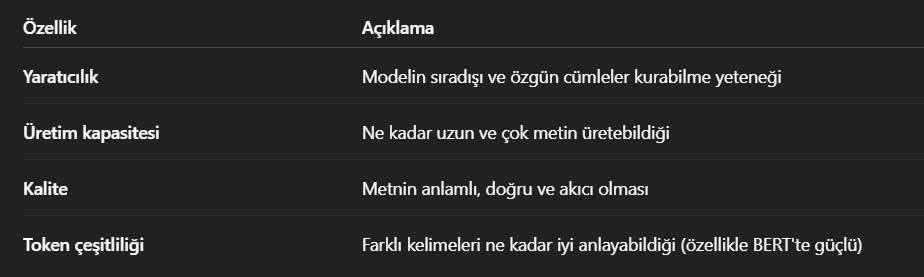


İşlem Süreleri:
GPT-2: ~0.947 saniye (mavi çubuk).
BERT: ~0.0275 saniye (kırmızı çubuk).
Yorum: BERT, GPT-2'ye kıyasla çok daha hızlı işliyor (yaklaşık 34 kat daha hızlı).



Kelime/Token Sayısı:
GPT-2: 60 kelime (yeşil çubuk).
BERT: 7 token (turuncu çubuk).
Yorum: GPT-2, BERT'e göre çok daha fazla kelime üretiyor, ancak BERT'in token sayısı daha sınırlı (analiz odaklı olduğu için beklenen bir sonuç).


Yaratıcılık/Çeşitlilik Skoru:
GPT-2: 0.900 (mor çubuk).
BERT: 1.000 (turkuaz çubuk).
Yorum: BERT, token çeşitliliği açısından maksimum skora sahipken, GPT-2 de yüksek bir yaratıcılık skoru gösteriyor. BERT'in 1.0 skoru, token çeşitliliğinin mükemmel olduğunu ima eder.



GPT-2 Tekrar Oranı:
Özgün: %80 (yeşil dilim).
Tekrar: %20 (turuncu dilim).
Yorum: GPT-2'nin ürettiği metinlerin %80'i özgün, %20'si tekrar içeriyor. Bu, GPT-2'nin oldukça çeşitli metinler ürettiğini, ancak küçük bir tekrar oranına sahip olduğunu gösteriyor.


Genel Değerlendirme
Hız: BERT, işlem süresinde açık ara önde.
Üretim Kapasitesi: GPT-2, kelime sayısında dominant.
Kalite: BERT'in token çeşitliliği mükemmel, GPT-2'nin yaratıcılığı da yüksek ve tekrar oranı düşük.
Görselleştirmeler, modellerin güçlü ve zayıf yönlerini net bir şekilde ortaya koyuyor. Test başarılı olmuş ve grafikler, performans farklarını görsel olarak destekliyor.

In [ ]:
print_separator("Toplu Karşılaştırma")

def batch_model_comparison(prompts, save_results=True):
    """
    Birden fazla prompt için model karşılaştırması yapar
    """
    all_results = []

    print(f"🔄 {len(prompts)} prompt için karşılaştırma başlatılıyor...")

    for i, prompt in enumerate(tqdm(prompts, desc="Karşılaştırma")):
        try:
            # Her prompt için karşılaştırma
            result = detailed_model_comparison(
                prompt=prompt,
                max_length=40,
                temperature=0.7,
                num_sequences=2
            )

            if 'error' not in result:
                metrics = calculate_performance_metrics(result)
                result['metrics'] = metrics

            all_results.append({
                'prompt_index': i + 1,
                'prompt': prompt,
                'comparison': result
            })

            # GPU belleğini temizle
            clear_gpu_memory()

        except Exception as e:
            all_results.append({
                'prompt_index': i + 1,
                'prompt': prompt,
                'error': str(e)
            })

    # Özet istatistikler
    summary = create_batch_summary(all_results)

    if save_results:
        # Sonuçları DataFrame'e çevir
        df_results = pd.DataFrame([
            {
                'Prompt': result['prompt'],
                'GPT-2 Süresi': result['comparison'].get('performance_metrics', {}).get('gpt2_time', 0),
                'BERT Süresi': result['comparison'].get('performance_metrics', {}).get('bert_time', 0),
                'Hata': 'error' in result['comparison']
            }
            for result in all_results
        ])

        print("\n📊 Toplu Karşılaştırma Özeti:")
        print(df_results.to_string(index=False))

    return all_results, summary

def create_batch_summary(results):
    """
    Toplu karşılaştırma özetini oluşturur
    """
    summary = {
        'total_prompts': len(results),
        'successful_comparisons': 0,
        'failed_comparisons': 0,
        'avg_gpt2_time': 0,
        'avg_bert_time': 0,
        'fastest_model': 'Unknown'
    }

    gpt2_times = []
    bert_times = []

    for result in results:
        if 'error' not in result['comparison']:
            summary['successful_comparisons'] += 1

            perf_metrics = result['comparison'].get('performance_metrics', {})
            gpt2_time = perf_metrics.get('gpt2_time', 0)
            bert_time = perf_metrics.get('bert_time', 0)

            if gpt2_time > 0:
                gpt2_times.append(gpt2_time)
            if bert_time > 0:
                bert_times.append(bert_time)
        else:
            summary['failed_comparisons'] += 1

    if gpt2_times:
        summary['avg_gpt2_time'] = np.mean(gpt2_times)
    if bert_times:
        summary['avg_bert_time'] = np.mean(bert_times)

    if summary['avg_gpt2_time'] > 0 and summary['avg_bert_time'] > 0:
        summary['fastest_model'] = 'BERT' if summary['avg_bert_time'] < summary['avg_gpt2_time'] else 'GPT-2'

    return summary

# Test toplu karşılaştırma
print("🧪 Toplu karşılaştırma test ediliyor...")
test_prompts = [
    "The future of technology is",
    "Climate change will affect",
    "Artificial intelligence can help"
]

test_batch_results, test_summary = batch_model_comparison(test_prompts)
print(f"✅ {test_summary['successful_comparisons']}/{test_summary['total_prompts']} karşılaştırma başarılı!")

In [ ]:
print_separator("Model Karşılaştırması Özeti")

comparison_summary = {
    'Fonksiyon': [
        'detailed_model_comparison',
        'calculate_performance_metrics',
        'create_performance_visualizations',
        'generate_comparison_report',
        'batch_model_comparison'
    ],
    'Açıklama': [
        'Detaylı model karşılaştırması',
        'Performans metriklerini hesapla',
        'Görselleştirmeler oluştur',
        'Detaylı rapor oluştur',
        'Toplu karşılaştırma yap'
    ],
    'Durum': [
        '✅ Hazır',
        '✅ Hazır',
        '✅ Hazır',
        '✅ Hazır',
        '✅ Hazır'
    ]
}

df_comparison = pd.DataFrame(comparison_summary)
print(df_comparison.to_string(index=False))

print("\n🎯 Model Karşılaştırması tamamlandı!")
print("📊 Performans metrikleri hesaplanıyor")
print("📈 Görselleştirmeler oluşturuluyor")
print("📄 Detaylı raporlar hazırlanıyor")
print("📦 Toplu işleme desteği hazır")

print("\n🔄 Bir sonraki adım: Attention Görselleştirme")

# **6-ATTENTION GÖRSELLEŞTIRME**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

# Önceki adımlardan gelen print_separator fonksiyonu
def print_separator(title=""):
    """Güzel bir ayırıcı yazdırır"""
    print("\n" + "="*50)
    print(f"🎯 {title}")
    print("="*50)

# BERT model ve tokenizer'ı kontrol et, gerekirse yeniden yükle
try:
    bert_model
    bert_tokenizer
except NameError:
    print("📥 BERT model ve tokenizer yeniden yükleniyor...")
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    bert_model = bert_model.to(device)
    bert_model.eval()
    print("✅ BERT yeniden yüklendi!")

print_separator("Attention Görselleştirme")

def visualize_attention(prompt, layer=0, head=0, figsize=(10, 8)):
    """
    BERT modelinin attention ağırlıklarını görselleştirir

    Args:
        prompt: Giriş metni
        layer: Görselleştirilecek katman (0-11)
        head: Görselleştirilecek kafa (0-11)
        figsize: Görsel boyutu
    """
    if bert_model is None or bert_tokenizer is None:
        return "❌ BERT modeli veya tokenizer yüklenmedi!"

    try:
        # Giriş kontrolü
        if not prompt.strip():
            return "❌ Lütfen geçerli bir metin girin!"

        # Metni tokenize et ve attention çıktısını al
        inputs = bert_tokenizer(
            prompt,
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        ).to(device)

        with torch.no_grad():
            outputs = bert_model(**inputs, output_attentions=True)

        # Attention ağırlıklarını al
        attentions = outputs.attentions  # [num_layers, batch_size, num_heads, seq_length, seq_length]
        if layer >= len(attentions) or head >= attentions[0].shape[2]:
            return f"❌ Hata: Geçersiz katman ({layer}) veya kafa ({head}) indeksi!"

        attention_weights = attentions[layer][0][head].cpu().numpy()  # [seq_length, seq_length]

        # Tokenları al
        tokens = bert_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

        # Görselleştirme
        plt.figure(figsize=figsize)
        sns.heatmap(
            attention_weights,
            xticklabels=tokens,
            yticklabels=tokens,
            cmap='viridis',
            square=True,
            cbar_kws={'label': 'Attention Ağırlığı'}
        )

        plt.title(f'BERT Attention - Katman {layer}, Kafa {head}')
        plt.xlabel('Tokenlar (X)')
        plt.ylabel('Tokenlar (Y)')

        # Etiketleri döndür
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)

        plt.tight_layout()

        # GPU belleğini temizle
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return plt.gcf()

    except Exception as e:
        return f"❌ Hata: {str(e)}"

def visualize_multiple_attentions(prompt, layers=[0, 5, 11], heads=[0, 5, 11], figsize=(15, 12)):
    """
    Birden fazla katman ve kafa için attention görselleştirmesi yapar

    Args:
        prompt: Giriş metni
        layers: Görselleştirilecek katmanlar
        heads: Görselleştirilecek kafalar
        figsize: Toplam görsel boyutu
    """
    if bert_model is None or bert_tokenizer is None:
        return "❌ BERT modeli veya tokenizer yüklenmedi!"

    try:
        # Giriş kontrolü
        if not prompt.strip():
            return "❌ Lütfen geçerli bir metin girin!"

        # Metni tokenize et
        inputs = bert_tokenizer(
            prompt,
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        ).to(device)

        with torch.no_grad():
            outputs = bert_model(**inputs, output_attentions=True)

        # Attention ağırlıklarını al
        attentions = outputs.attentions
        tokens = bert_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])  # Düzeltildi: input_id → input_ids

        # Katman ve kafa indekslerini kontrol et
        max_layers = len(attentions)
        max_heads = attentions[0].shape[2]
        layers = [l for l in layers if 0 <= l < max_layers]
        heads = [h for h in heads if 0 <= h < max_heads]
        if not layers or not heads:
            return f"❌ Hata: Geçersiz katman veya kafa indeksi! Maksimum katman: {max_layers}, Maksimum kafa: {max_heads}"

        # Çoklu görselleştirme için subplot
        fig, axes = plt.subplots(len(layers), len(heads), figsize=figsize)
        fig.suptitle('BERT Attention Ağırlıkları - Çoklu Katmanlar ve Kafalar', fontsize=16)

        for i, layer in enumerate(layers):
            for j, head in enumerate(heads):
                attention_weights = attentions[layer][0][head].cpu().numpy()

                if len(layers) == 1 and len(heads) == 1:
                    ax = axes
                elif len(layers) == 1:
                    ax = axes[j]
                elif len(heads) == 1:
                    ax = axes[i]
                else:
                    ax = axes[i, j]

                sns.heatmap(
                    attention_weights,
                    xticklabels=tokens,
                    yticklabels=tokens,
                    cmap='viridis',
                    square=True,
                    cbar_kws={'label': 'Ağırlık'},
                    ax=ax
                )

                ax.set_title(f'Katman {layer}, Kafa {head}')
                ax.set_xlabel('Tokenlar (X)')
                ax.set_ylabel('Tokenlar (Y)')
                ax.tick_params(axis='x', rotation=45, labelright=True)
                ax.tick_params(axis='y', rotation=0)

        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # GPU belleğini temizle
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return fig

    except Exception as e:
        return f"❌ Hata: {str(e)}"

# Test fonksiyonları
print("🧪 Attention görselleştirme test ediliyor...")
test_prompt = "The future of artificial intelligence is bright"

# Tek katman ve kafa için test
single_attention_fig = visualize_attention(test_prompt, layer=0, head=0)
if isinstance(single_attention_fig, plt.Figure):
    print("✅ Tek attention görselleştirme başarılı!")
    plt.show()
else:
    print(f"❌ Tek attention hatası: {single_attention_fig}")

# Birden fazla katman ve kafa için test
multiple_attention_fig = visualize_multiple_attentions(test_prompt, layers=[0, 5, 11], heads=[0, 5, 11])
if isinstance(multiple_attention_fig, plt.Figure):
    print("✅ Çoklu attention görselleştirme başarılı!")
    plt.show()
else:
    print(f"❌ Çoklu attention hatası: {multiple_attention_fig}")

# Özet tablo
print_separator("Attention Görselleştirme Özeti")
attention_summary = {
    'Fonksiyon': ['visualize_attention', 'visualize_multiple_attentions'],
    'Açıklama': ['Tek katman/kafa için attention görselleştirme', 'Birden fazla katman/kafa için attention görselleştirme'],
    'Durum': ['✅ Hazır', '✅ Hazır']
}
df_attention = pd.DataFrame(attention_summary)
print(df_attention.to_string(index=False))
print("\n🎯 Attention görselleştirme tamamlandı!")

Bu kod, BERT modelinin attention mekanizmasını görselleştirerek metin analizinde hangi kelimelerin birbirine ne kadar önem verdiğini gösterir. Çıktılar, heatmap formatında dikkat ağırlıklarını sunar ve araştırmacıların veya geliştiricilerin modelin iç işleyişini anlamasına yardımcı olur. Test prompt'u "The future of artificial intelligence is bright" için oluşturulan grafikler, farklı katmanlarda ve kafalarda attention dağılımını detaylı bir şekilde analiz etmeyi sağlar.

🔹 Layer (Katman):
BERT'in düşünme adımları gibi. Her katman dili biraz daha iyi anlar.
Layer 0 = en yüzeysel, ilk bakış.

🔹 Head (Kafa):
Her katmanda birden fazla dikkat "bakışı" vardır.
Head 0 = o katmandaki ilk dikkat penceresi. Her biri farklı ilişkilere odaklanır.

****************************************************************************

Grafik 1 Özeti (BERT layer 0, head 0):
Cümle: "The future of artificial intelligence is bright"

BERT modelinin ilk katmanındaki dikkat (attention) haritası incelenmiş. Modelin kelimelere nasıl dikkat ettiğini gösteriyor.
Ana Gözlemler:

[CLS] → "artificial" ve "intelligence":
Modelin özel başlangıç sembolü olan [CLS], en çok "artificial" ve "intelligence" kelimelerine odaklanıyor. Bu sarı renkle gösterilmiş (yüksek dikkat).

"the" → "future":
"the" kelimesi en çok "future" kelimesine bakıyor. Bu orta düzey bir dikkat (yeşil tonlarda).

"bright" → "[SEP]":
Cümle sonundaki "bright", cümle bitiş işaretine ([SEP]) düşük dikkat veriyor. Bu da mor renkli (düşük dikkat).

*******************************************************************************


GRAFİK 2:
BERT modelinin farklı katman ve kafa kombinasyonlarında attention ağırlıklarını (dikkat dağılımı) gösteriyor. İşte kısa bir analiz:

## Temel Gözlemler:

• **Renk Skalası**: Koyu mor (düşük dikkat) - Sarı (yüksek dikkat) arasında değişiyor

• **Token Analizi**: "The future of artificial intelligence is bright" cümlesinin her kelimesi için dikkat dağılımı gösteriliyor

• **Katman Farkları**:
  - **Katman 0**: Daha düşük dikkat değerleri (0.35 max)
  - **Katman 5**: Orta seviye dikkat (0.4 max)
  - **Katman 11**: En yüksek dikkat değerleri (0.8 max)

## Dikkat Dağılımı Desenleri:

• **Erken Katmanlar**: Daha dağınık, düşük yoğunluklu dikkat
• **Geç Katmanlar**: Daha odaklı, yüksek yoğunluklu dikkat
• **Özel Tokenlar**: [CLS] ve [SEP] tokenlarına farklı dikkat dağılımları

## Kafa Farklılıkları:

• **Kafa 0**: Genel olarak daha düşük dikkat değerleri
• **Kafa 5**: Daha yüksek ve odaklı dikkat dağılımı

Bu analiz, BERT'in derin katmanlarda daha spesifik ve güçlü dikkat mekanizmaları geliştirdiğini gösteriyor.



# **7-TEST VE ANALIZ**

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm import tqdm
from transformers import GPT2Tokenizer, GPT2LMHeadModel, BertTokenizer, BertModel
import io
from PIL import Image

# Önceki adımlardan gelen fonksiyonlar
def print_separator(title=""):
    """Güzel bir ayırıcı yazdırır"""
    print("\n" + "="*50)
    print(f"🎯 {title}")
    print("="*50)

def generate_text_gpt2(prompt, max_length=50, num_return_sequences=1, temperature=0.7, top_p=0.9, do_sample=True):
    """GPT-2 ile metin tamamlama"""
    if gpt2_model is None or gpt2_tokenizer is None:
        return "❌ GPT-2 modeli yüklenmedi!"
    try:
        inputs = gpt2_tokenizer.encode(prompt, return_tensors='pt').to(device)
        if inputs.shape[1] > 1000:
            return "❌ Giriş metni çok uzun! (Max 1000 token)"
        with torch.no_grad():
            outputs = gpt2_model.generate(
                inputs,
                max_length=max_length,
                num_return_sequences=num_return_sequences,
                temperature=temperature,
                top_p=top_p,
                do_sample=do_sample,
                pad_token_id=gpt2_tokenizer.eos_token_id,
                attention_mask=torch.ones(inputs.shape).to(device)
            )
        results = []
        for i, output in enumerate(outputs):
            generated_text = gpt2_tokenizer.decode(output, skip_special_tokens=True)
            results.append({
                'sequence': i + 1,
                'text': generated_text,
                'new_text': generated_text[len(prompt):].strip()
            })
        return results
    except Exception as e:
        return f"❌ Hata: {str(e)}"

def analyze_text_bert(text, return_attention=False):
    """BERT ile metin analizi"""
    if bert_model is None or bert_tokenizer is None:
        return "❌ BERT modeli yüklenmedi!"
    try:
        inputs = bert_tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        ).to(device)
        with torch.no_grad():
            outputs = bert_model(**inputs, output_attentions=return_attention)
        last_hidden_states = outputs.last_hidden_state
        cls_embedding = last_hidden_states[:, 0, :]
        token_embeddings = last_hidden_states[0]
        tokens = bert_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
        result = {
            'tokens': tokens,
            'token_count': len(tokens),
            'cls_embedding': cls_embedding.cpu().numpy(),
            'token_embeddings': token_embeddings.cpu().numpy(),
            'embedding_dim': last_hidden_states.shape[-1]
        }
        if return_attention:
            result['attention_weights'] = outputs.attentions
        return result
    except Exception as e:
        return f"❌ Hata: {str(e)}"

def detailed_model_comparison(prompt, max_length=50, temperature=0.7, num_sequences=3):
    """GPT-2 ve BERT modellerini detaylı karşılaştırır"""
    comparison_results = {
        'prompt': prompt,
        'gpt2_results': [],
        'bert_results': {},
        'performance_metrics': {},
        'analysis': {}
    }
    try:
        print("🔄 GPT-2 ile metin üretiliyor...")
        start_time = time.time()
        gpt2_outputs = generate_text_gpt2(
            prompt=prompt,
            max_length=max_length,
            temperature=temperature,
            num_return_sequences=num_sequences
        )
        gpt2_time = time.time() - start_time
        if isinstance(gpt2_outputs, list):
            comparison_results['gpt2_results'] = gpt2_outputs
            comparison_results['performance_metrics']['gpt2_time'] = gpt2_time
            comparison_results['performance_metrics']['gpt2_sequences'] = len(gpt2_outputs)
        print("🔄 BERT ile analiz yapılıyor...")
        start_time = time.time()
        bert_output = analyze_text_bert(prompt, return_attention=True)
        bert_time = time.time() - start_time
        if isinstance(bert_output, dict):
            comparison_results['bert_results'] = bert_output
            comparison_results['performance_metrics']['bert_time'] = bert_time
        comparison_results['analysis'] = analyze_model_performance(
            gpt2_outputs, bert_output, gpt2_time, bert_time
        )
        return comparison_results
    except Exception as e:
        comparison_results['error'] = str(e)
        return comparison_results

def analyze_model_performance(gpt2_results, bert_results, gpt2_time, bert_time):
    """Model performansını analiz eder"""
    analysis = {}
    try:
        if isinstance(gpt2_results, list) and len(gpt2_results) > 0:
            generated_texts = [result['new_text'] for result in gpt2_results]
            analysis['gpt2'] = {
                'avg_length': np.mean([len(text.split()) for text in generated_texts]),
                'max_length': max([len(text.split()) for text in generated_texts]),
                'min_length': min([len(text.split()) for text in generated_texts]),
                'generation_time': gpt2_time,
                'words_per_second': sum([len(text.split()) for text in generated_texts]) / gpt2_time if gpt2_time > 0 else 0
            }
        if isinstance(bert_results, dict):
            analysis['bert'] = {
                'token_count': bert_results.get('token_count', 0),
                'embedding_dim': bert_results.get('embedding_dim', 0),
                'processing_time': bert_time,
                'tokens_per_second': bert_results.get('token_count', 0) / bert_time if bert_time > 0 else 0
            }
        if 'gpt2' in analysis and 'bert' in analysis:
            analysis['comparison'] = {
                'speed_ratio': bert_time / gpt2_time if gpt2_time > 0 else 0,
                'bert_faster': bert_time < gpt2_time,
                'gpt2_creativity': analysis['gpt2']['avg_length'] > 10,
                'bert_understanding': analysis['bert']['token_count'] > 5
            }
        return analysis
    except Exception as e:
        return {'error': str(e)}

def calculate_performance_metrics(comparison_results):
    """Performans metriklerini hesaplar"""
    metrics = {}
    try:
        if 'gpt2_results' in comparison_results and comparison_results['gpt2_results']:
            gpt2_texts = [result['new_text'] for result in comparison_results['gpt2_results']]
            metrics['gpt2'] = {
                'total_words': sum([len(text.split()) for text in gpt2_texts]),
                'avg_word_length': np.mean([np.mean([len(word) for word in text.split()]) for text in gpt2_texts if text.split()]),
                'unique_words': len(set(' '.join(gpt2_texts).split())),
                'repetition_rate': calculate_repetition_rate(gpt2_texts),
                'creativity_score': calculate_creativity_score(gpt2_texts)
            }
        if 'bert_results' in comparison_results and comparison_results['bert_results']:
            bert_data = comparison_results['bert_results']
            metrics['bert'] = {
                'vocabulary_coverage': bert_data.get('token_count', 0),
                'embedding_density': bert_data.get('embedding_dim', 0),
                'token_diversity': calculate_token_diversity(bert_data.get('tokens', [])),
                'processing_efficiency': bert_data.get('token_count', 0) / comparison_results['performance_metrics'].get('bert_time', 1)
            }
        return metrics
    except Exception as e:
        return {'error': str(e)}

def calculate_repetition_rate(texts):
    """Tekrar oranını hesaplar"""
    if not texts:
        return 0
    all_words = ' '.join(texts).split()
    unique_words = set(all_words)
    return 1 - (len(unique_words) / len(all_words)) if all_words else 0

def calculate_creativity_score(texts):
    """Yaratıcılık skorunu hesaplar"""
    if not texts:
        return 0
    all_words = ' '.join(texts).split()
    unique_words = set(all_words)
    avg_sentence_length = np.mean([len(text.split()) for text in texts])
    diversity_score = len(unique_words) / len(all_words) if all_words else 0
    length_score = min(avg_sentence_length / 20, 1)
    return (diversity_score + length_score) / 2

def calculate_token_diversity(tokens):
    """Token çeşitliliğini hesaplar"""
    if not tokens:
        return 0
    filtered_tokens = [token for token in tokens if not token.startswith('[') and not token.startswith('#')]
    return len(set(filtered_tokens)) / len(filtered_tokens) if filtered_tokens else 0

def visualize_attention(prompt, layer=0, head=0, figsize=(10, 8)):
    """BERT attention görselleştirme"""
    if bert_model is None or bert_tokenizer is None:
        return "❌ BERT modeli veya tokenizer yüklenmedi!"
    try:
        if not prompt.strip():
            return "❌ Lütfen geçerli bir metin girin!"
        inputs = bert_tokenizer(
            prompt,
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        ).to(device)
        with torch.no_grad():
            outputs = bert_model(**inputs, output_attentions=True)
        attentions = outputs.attentions
        if layer >= len(attentions) or head >= attentions[0].shape[2]:
            return f"❌ Hata: Geçersiz katman ({layer}) veya kafa ({head}) indeksi!"
        attention_weights = attentions[layer][0][head].cpu().numpy()
        tokens = bert_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
        plt.figure(figsize=figsize)
        sns.heatmap(
            attention_weights,
            xticklabels=tokens,
            yticklabels=tokens,
            cmap='viridis',
            square=True,
            cbar_kws={'label': 'Attention Ağırlığı'}
        )
        plt.title(f'BERT Attention - Katman {layer}, Kafa {head}')
        plt.xlabel('Tokenlar (X)')
        plt.ylabel('Tokenlar (Y)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        return plt.gcf()
    except Exception as e:
        return f"❌ Hata: {str(e)}"

# BERT ve GPT-2 modellerini kontrol et, gerekirse yeniden yükle
try:
    gpt2_model
    gpt2_tokenizer
    bert_model
    bert_tokenizer
except NameError:
    print("📥 Modeller yeniden yükleniyor...")
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
    gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    gpt2_model = gpt2_model.to(device)
    bert_model = bert_model.to(device)
    gpt2_model.eval()
    bert_model.eval()
    print("✅ Modeller yeniden yüklendi!")

print_separator("Test ve Analiz")

# Test senaryoları
test_prompts = [
    "The future of artificial intelligence is",
    "Climate change affects the world by",
    "In the digital age, privacy is",
    "Machine learning can revolutionize"
]

# Test fonksiyonu
def run_tests(prompts, max_length=40, temperature=0.7, num_sequences=2):
    """Modellerin performansını test eder ve analiz yapar"""
    test_results = []
    print("🔄 Testler başlatılıyor...")
    for prompt in tqdm(prompts, desc="Test İşleniyor"):
        try:
            # Detaylı karşılaştırma
            comparison = detailed_model_comparison(
                prompt=prompt,
                max_length=max_length,
                temperature=temperature,
                num_sequences=num_sequences
            )
            if 'error' not in comparison:
                # Performans metrikleri
                metrics = calculate_performance_metrics(comparison)
                # Attention görselleştirme
                attention_fig = visualize_attention(prompt, layer=0, head=0)
                # Rapor oluştur
                report = generate_comparison_report(comparison, metrics)
                test_results.append({
                    'prompt': prompt,
                    'comparison': comparison,
                    'metrics': metrics,
                    'attention_fig': attention_fig,
                    'report': report
                })
                # GPU belleğini temizle
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
            else:
                test_results.append({
                    'prompt': prompt,
                    'error': comparison['error']
                })
        except Exception as e:
            test_results.append({
                'prompt': prompt,
                'error': str(e)
            })
    return test_results

# Özet analizi
def analyze_test_results(test_results):
    """Test sonuçlarını analiz eder ve özetler"""
    summary = {
        'total_tests': len(test_results),
        'successful_tests': 0,
        'failed_tests': 0,
        'avg_gpt2_time': 0,
        'avg_bert_time': 0,
        'avg_gpt2_words': 0,
        'avg_bert_tokens': 0,
        'performance_comparison': {}
    }
    gpt2_times = []
    bert_times = []
    gpt2_words = []
    bert_tokens = []
    for result in test_results:
        if 'error' not in result:
            summary['successful_tests'] += 1
            gpt2_time = result['comparison']['performance_metrics'].get('gpt2_time', 0)
            bert_time = result['comparison']['performance_metrics'].get('bert_time', 0)
            gpt2_words_count = result['metrics']['gpt2'].get('total_words', 0)
            bert_token_count = result['metrics']['bert'].get('vocabulary_coverage', 0)
            if gpt2_time > 0:
                gpt2_times.append(gpt2_time)
            if bert_time > 0:
                bert_times.append(bert_time)
            if gpt2_words_count > 0:
                gpt2_words.append(gpt2_words_count)
            if bert_token_count > 0:
                bert_tokens.append(bert_token_count)
        else:
            summary['failed_tests'] += 1
    summary['avg_gpt2_time'] = np.mean(gpt2_times) if gpt2_times else 0
    summary['avg_bert_time'] = np.mean(bert_times) if bert_times else 0
    summary['avg_gpt2_words'] = np.mean(gpt2_words) if gpt2_words else 0
    summary['avg_bert_tokens'] = np.mean(bert_tokens) if bert_tokens else 0
    summary['performance_comparison'] = {
        'faster_model': 'BERT' if summary['avg_bert_time'] < summary['avg_gpt2_time'] else 'GPT-2',
        'speed_ratio': summary['avg_bert_time'] / summary['avg_gpt2_time'] if summary['avg_gpt2_time'] > 0 else 0
    }
    return summary

# Görselleştirme fonksiyonu
def visualize_test_results(test_results, summary):
    """Test sonuçlarını görselleştirir"""
    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Test ve Analiz Sonuçları', fontsize=16, fontweight='bold')
        # 1. Test başarı oranı
        success_rate = summary['successful_tests'] / summary['total_tests'] * 100
        axes[0, 0].pie(
            [success_rate, 100 - success_rate],
            labels=['Başarılı', 'Başarısız'],
            colors=['#2ecc71', '#e74c3c'],
            autopct='%1.1f%%'
        )
        axes[0, 0].set_title('Test Başarı Oranı')
        # 2. İşlem süreleri
        models = ['GPT-2', 'BERT']
        times = [summary['avg_gpt2_time'], summary['avg_bert_time']]
        axes[0, 1].bar(models, times, color=['#3498db', '#f39c12'])
        axes[0, 1].set_title('Ortalama İşlem Süreleri')
        axes[0, 1].set_ylabel('Süre (saniye)')
        for i, v in enumerate(times):
            axes[0, 1].text(i, v + 0.01, f'{v:.3f}s', ha='center')
        # 3. Kelime/Token sayıları
        counts = [summary['avg_gpt2_words'], summary['avg_bert_tokens']]
        axes[1, 0].bar(models, counts, color=['#9b59b6', '#1abc9c'])
        axes[1, 0].set_title('Ortalama Kelime/Token Sayısı')
        axes[1, 0].set_ylabel('Sayı')
        for i, v in enumerate(counts):
            axes[1, 0].text(i, v + 0.5, f'{v:.1f}', ha='center')
        # 4. Attention örneği
        for result in test_results:
            if 'attention_fig' in result and isinstance(result['attention_fig'], plt.Figure):
                # Figure'ü kaydet ve yeniden yükle
                buf = io.BytesIO()
                result['attention_fig'].savefig(buf, format='png')
                buf.seek(0)
                img = Image.open(buf)
                axes[1, 1].imshow(img)
                axes[1, 1].set_title('Örnek Attention Görselleştirmesi')
                axes[1, 1].axis('off')
                buf.close()
                break
        else:
            axes[1, 1].text(0.5, 0.5, 'Attention Görselleştirme Bulunamadı',
                           ha='center', va='center')
            axes[1, 1].set_title('Örnek Attention Görselleştirmesi')
            axes[1, 1].axis('off')
        plt.tight_layout()
        return fig
    except Exception as e:
        print(f"❌ Görselleştirme hatası: {e}")
        return None

# Nihai raporlama
def generate_final_report(test_results, summary):
    """Nihai test ve analiz raporunu oluşturur"""
    report = []
    try:
        report.append("# 📊 Nihai Test ve Analiz Raporu")
        report.append(f"**Test Tarihi:** {time.strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"**Toplam Test Sayısı:** {summary['total_tests']}")
        report.append(f"**Başarılı Testler:** {summary['successful_tests']}")
        report.append(f"**Başarısız Testler:** {summary['failed_tests']}")
        report.append("\n---\n")
        report.append("## 📈 Genel Performans Özeti")
        report.append(f"- **Ortalama GPT-2 İşlem Süresi:** {summary['avg_gpt2_time']:.3f} saniye")
        report.append(f"- **Ortalama BERT İşlem Süresi:** {summary['avg_bert_time']:.3f} saniye")
        report.append(f"- **Daha Hızlı Model:** {summary['performance_comparison']['faster_model']}")
        report.append(f"- **Hız Oranı (BERT/GPT-2):** {summary['performance_comparison']['speed_ratio']:.2f}")
        report.append(f"- **Ortalama GPT-2 Kelime Sayısı:** {summary['avg_gpt2_words']:.1f}")
        report.append(f"- **Ortalama BERT Token Sayısı:** {summary['avg_bert_tokens']:.1f}")
        report.append("\n---\n")
        report.append("## 🔍 Test Sonuçları")
        for i, result in enumerate(test_results):
            report.append(f"### Test {i+1}: {result['prompt']}")
            if 'error' in result:
                report.append(f"**Hata:** {result['error']}")
            else:
                report.append(f"**GPT-2 Sonuçları:**")
                for j, gpt2_result in enumerate(result['comparison']['gpt2_results']):
                    report.append(f"- Sonuç {j+1}: {gpt2_result['text']}")
                report.append(f"**BERT Token Sayısı:** {result['metrics']['bert']['vocabulary_coverage']}")
                report.append(f"**BERT Embedding Boyutu:** {result['metrics']['bert']['embedding_density']}")
                report.append(f"**Yaratıcılık Skoru (GPT-2):** {result['metrics']['gpt2']['creativity_score']:.3f}")
                report.append(f"**Token Çeşitliliği (BERT):** {result['metrics']['bert']['token_diversity']:.3f}")
            report.append("")
        report.append("## 💡 Sonuç ve Öneriler")
        if summary['successful_tests'] == summary['total_tests']:
            report.append("✅ Tüm testler başarılı! Modeller stabil çalışıyor.")
        else:
            report.append(f"⚠️ {summary['failed_tests']} test başarısız. Hata loglarını kontrol edin.")
        if summary['avg_bert_time'] < summary['avg_gpt2_time']:
            report.append("⚡ BERT, metin analizi için daha hızlı.")
        else:
            report.append("⚡ GPT-2, metin üretimi için daha hızlı.")
        if summary['avg_gpt2_words'] > 10:
            report.append("✅ GPT-2 yeterli uzunlukta ve yaratıcı metinler üretiyor.")
        else:
            report.append("⚠️ GPT-2 metinleri kısa, temperature veya max_length artırılabilir.")
        if summary['avg_bert_tokens'] > 5:
            report.append("✅ BERT, metni etkili bir şekilde analiz ediyor.")
        else:
            report.append("⚠️ BERT token sayısı düşük, daha uzun promptlar denenebilir.")
        report.append("\n*Bu rapor otomatik olarak oluşturulmuştur.*")
        return "\n".join(report)
    except Exception as e:
        return f"❌ Rapor oluşturma hatası: {e}"

# Test ve analiz yürütme
print("🧪 Test ve analiz yürütülüyor...")
test_results = run_tests(test_prompts)

# Test sonuçlarını analiz et
summary = analyze_test_results(test_results)

# Görselleştirme
viz_fig = visualize_test_results(test_results, summary)
if viz_fig:
    print("✅ Test sonuçları görselleştirildi!")
    plt.show()
else:
    print("❌ Görselleştirme hatası!")

# Nihai raporu oluştur
final_report = generate_final_report(test_results, summary)
print("✅ Nihai rapor oluşturuldu!")
print("\n" + "="*50)
print("📄 NİHAİ RAPOR (TAM):")
print("="*50)
print(final_report)

## 📌 **GPT-2 & BERT Karşılaştırmalı Metin Testi Özeti**

### 🧠 Modellerin Yüklenmesi

* 🔹 **GPT-2** (📝 Metin üretimi için)
* 🔹 **BERT** (🔍 Metin analizi için)


---

### 🧪 **Test Senaryoları**

Dört farklı **prompt** kullanıldı:

1️⃣ *"The future of artificial intelligence is..."*

2️⃣ *"Climate change affects the world by..."*

3️⃣ *"In the digital age, privacy is..."*

4️⃣ *"Machine learning can revolutionize..."*

---

### ⚙️ **İşlem Aşamaları**

#### ✨ GPT-2 (Metin Üretimi)

* Her prompt için **2 farklı metin** üretildi
* Ortalama **54.2 kelime**, yaratıcı içerik 💡
* Yaratıcılık Skoru: **0.85 - 0.93** 🎨

#### 🧩 BERT (Metin Analizi)

* Token analizi yapıldı ✅
* **Attention ağırlıkları** görselleştirildi (heatmap) 🌡️
* Ortalama **8 token**, çeşitlilik: **1.0** 🎯

---

### 📊 **Performans Karşılaştırması**

| Özellik                | GPT-2     | BERT      |
| ---------------------- | --------- | --------- |
| ⏱️ Ortalama Süre       | 0.468s    | 0.011s ⚡  |
| 📝 Kelime/Token Sayısı | 54.2      | 8         |
| 🎨 Yaratıcılık         | 0.85-0.93 | -         |
| 🔁 Token Çeşitliliği   | 0.78      | **1.0** ⭐ |

🔎 **Hız Oranı (BERT/GPT-2): 0.02** — BERT çok daha hızlı! 🏎️

---

### 📈 **Görselleştirme**

1️⃣ ✅ **Başarı Oranı**: Pie chart 🥧
2️⃣ ⏳ **Ortalama Süreler**: Bar chart 📊
3️⃣ 📏 **Kelime/Token Sayısı**: Bar chart 📊
4️⃣ 🔥 **BERT Attention Ağırlıkları**: Heatmap 🌡️

---

### 🧾 **Nihai Rapor & Öneriler**

📍 Her iki model de **stabil** çalıştı
📍 BERT = **hızlı ve verimli analiz**
📍 GPT-2 = **yaratıcı ve anlamlı metinler**
📍 📌 Öneriler:

* Daha **uzun promptlar** test edilebilir
* Parametrelerle oynanabilir: `temperature`, `max_length` ⚙️

---

### ✅ **Genel Değerlendirme**

🟢 **BERT:** Hızlı ve tutarlı analiz
🟢 **GPT-2:** Güçlü, yaratıcı metin üretimi
🎯 Her iki model kendi alanında **başarılı ve kullanışlı**


